In [10]:
import pandas as pd

# Assuming the dataset is stored in a CSV file named 'air_quality.csv'
# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(df.info())

# Display summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())

# Check for missing values in the dataset
print("\nChecking for missing values:")
print(df.isnull().sum())

# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Display the shape of the dataset
print("\nShape of the dataset (rows, columns):")
print(df.shape)

# Display the range of dates in the dataset
print("\nDate range in the dataset:")
print(df['From Date'].min(), "to", df['From Date'].max())



First few rows of the dataset:
             From Date  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
0  2020-02-26 11:00:00       0.028351      0.048651    0.050902     0.035364   
1  2020-02-26 14:00:00       0.035551      0.051292    0.055549     0.074197   
2  2020-04-28 18:00:00       0.008990      0.044428    0.013965     0.076526   
3  2020-06-17 14:00:00       0.021880      0.035472    0.011820     0.033409   
4  2020-06-17 17:00:00       0.016430      0.045869    0.017372     0.059065   

   NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  Ozone (ug/m3)  ...  \
0   0.078526     0.037469     0.009438    0.033951       0.028510  ...   
1   0.118562     0.037497     0.026900    0.049383       0.055517  ...   
2   0.063383     0.038167     0.070405    0.026749       0.376390  ...   
3   0.041540     0.025175     0.006157    0.042181       0.309700  ...   
4   0.070171     0.011707     0.023569    0.070988       0.172111  ...   

   Eth-Benzene (ug/m3)  MP-Xylene (ug/m3)  

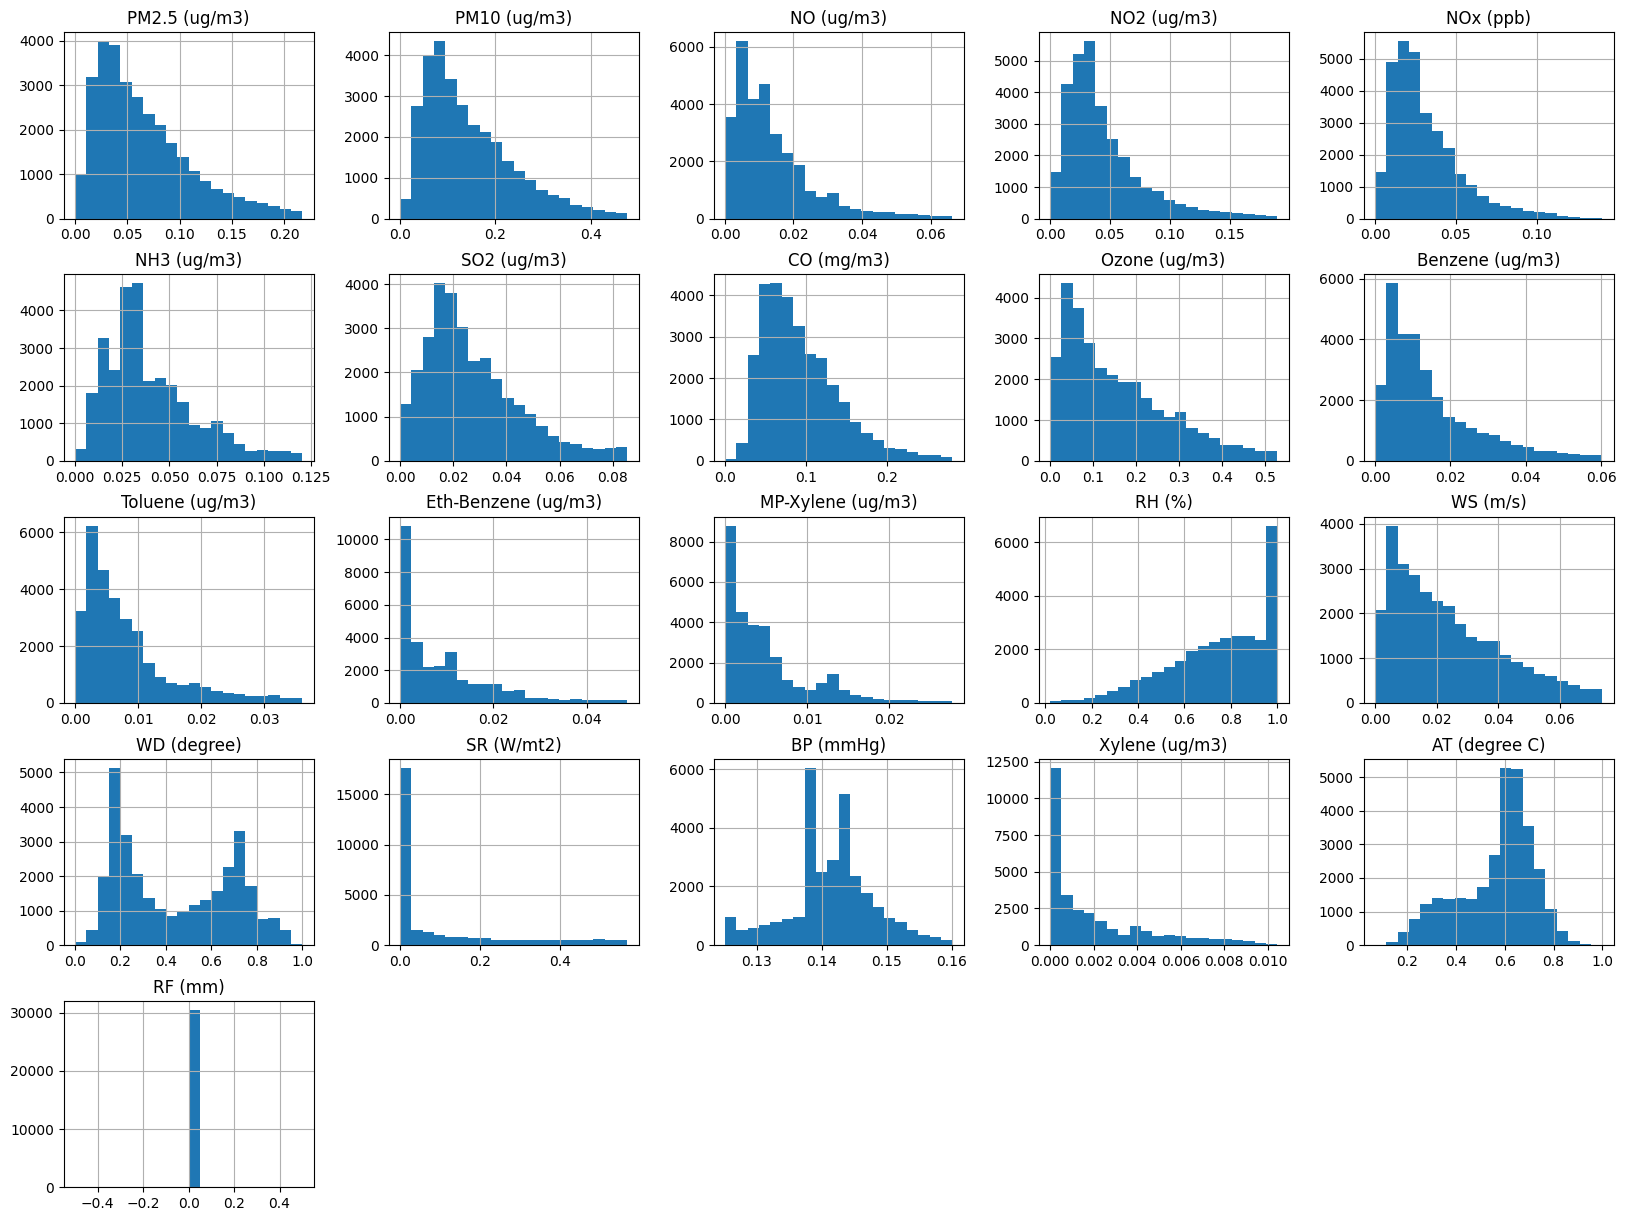

In [4]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical features
df.hist(figsize=(20, 15), bins=20)
plt.show()


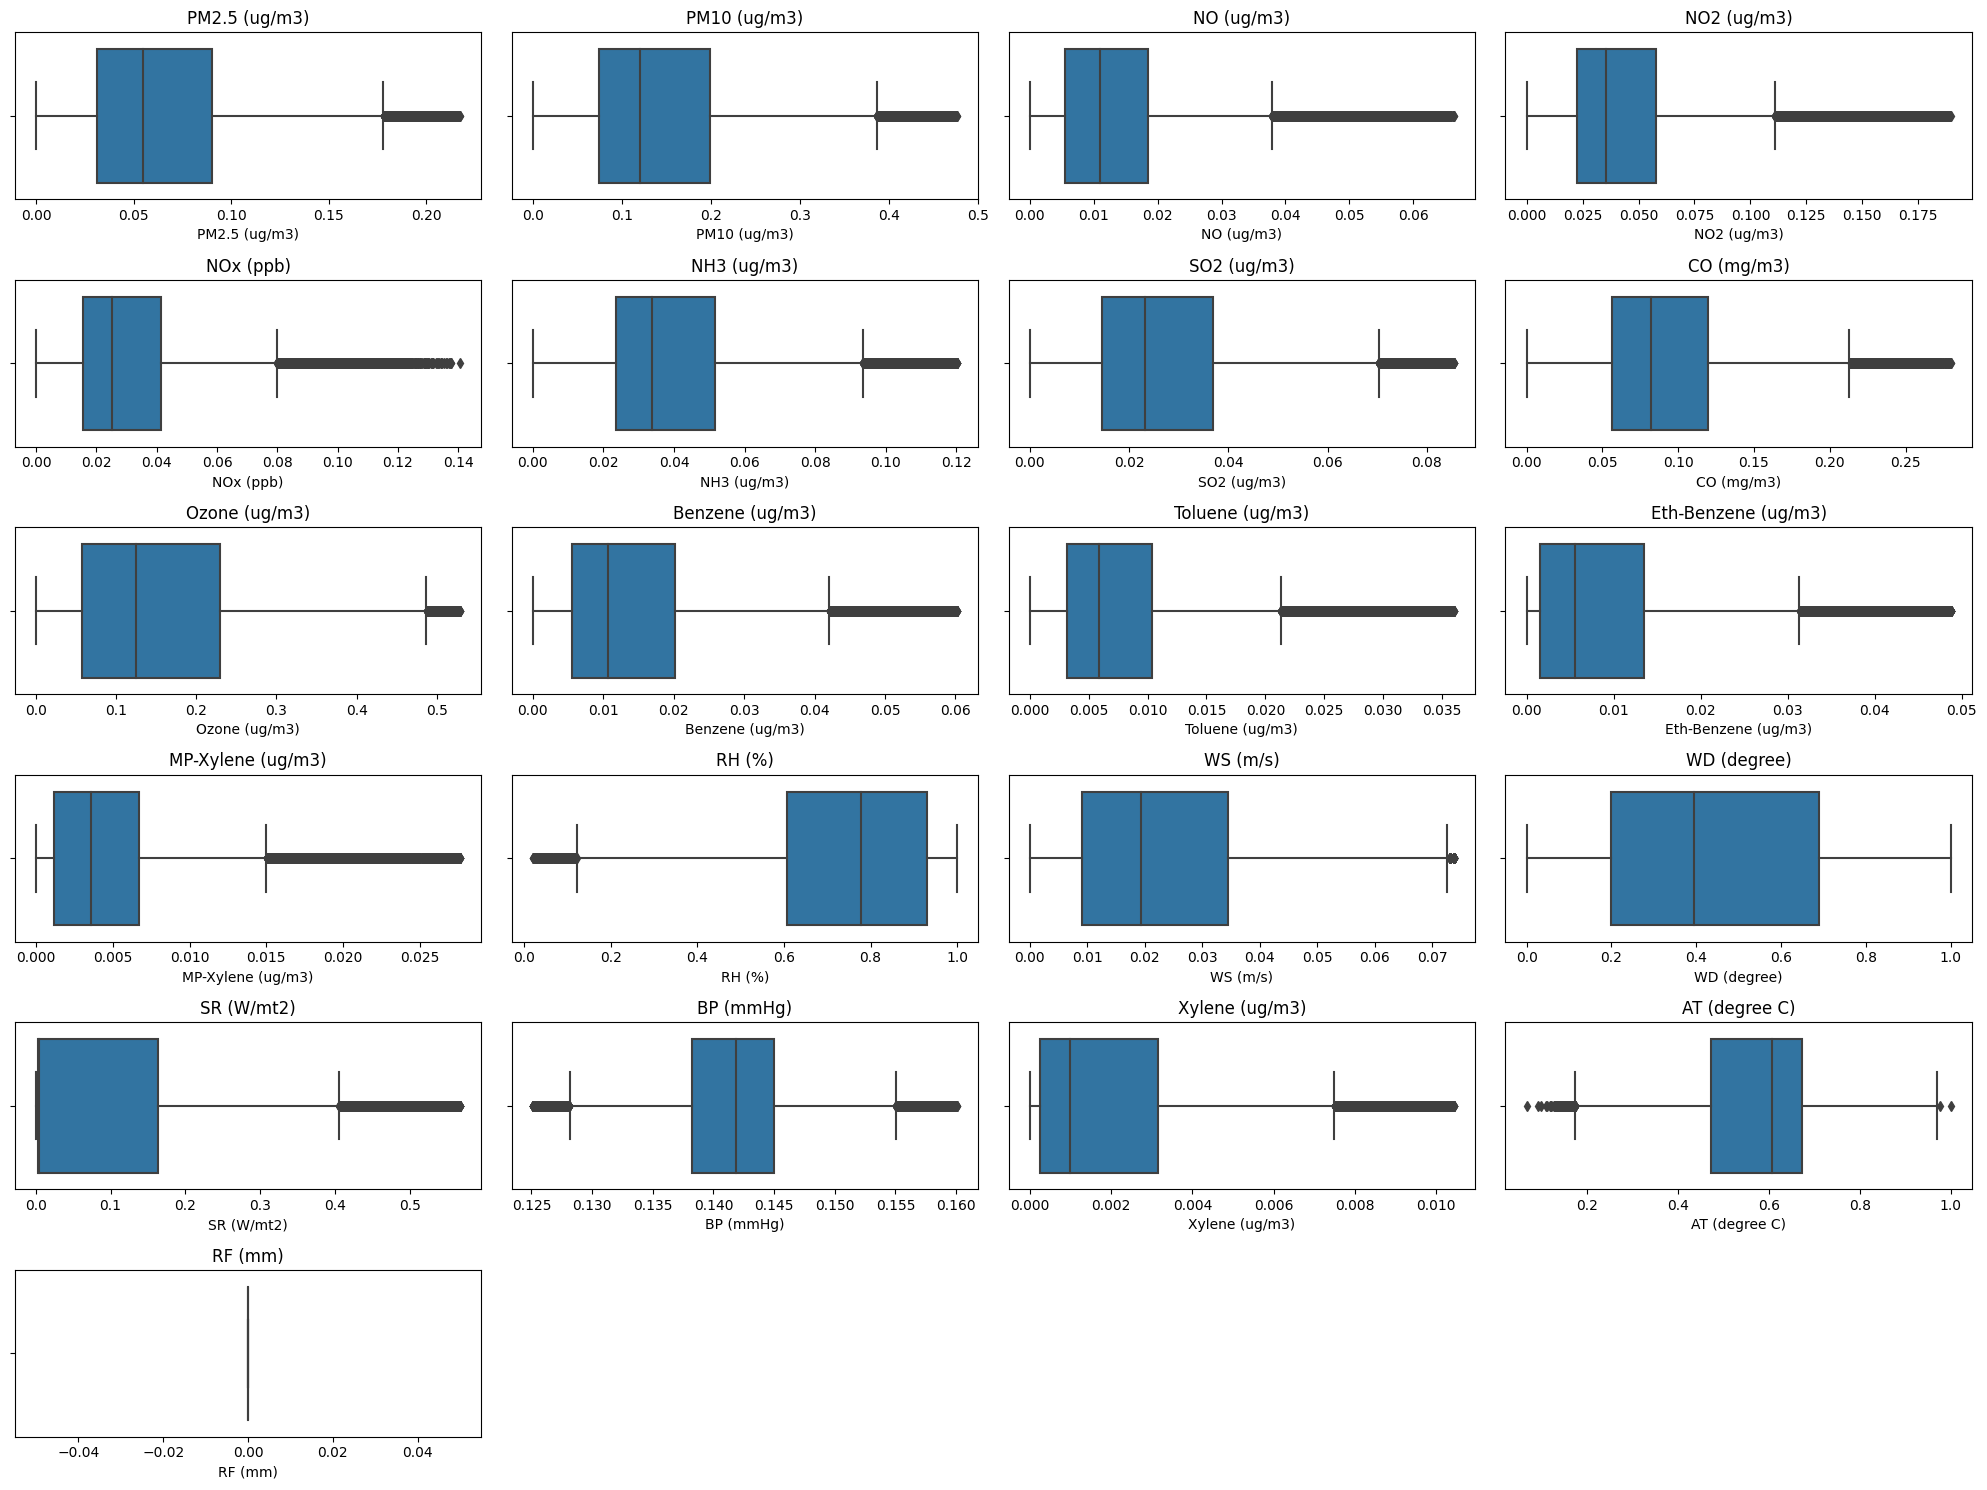

In [6]:
import seaborn as sns

# Plot box plots for all numerical features
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[1:]):  # Exclude 'From Date'
    plt.subplot(6, 4, i+1)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


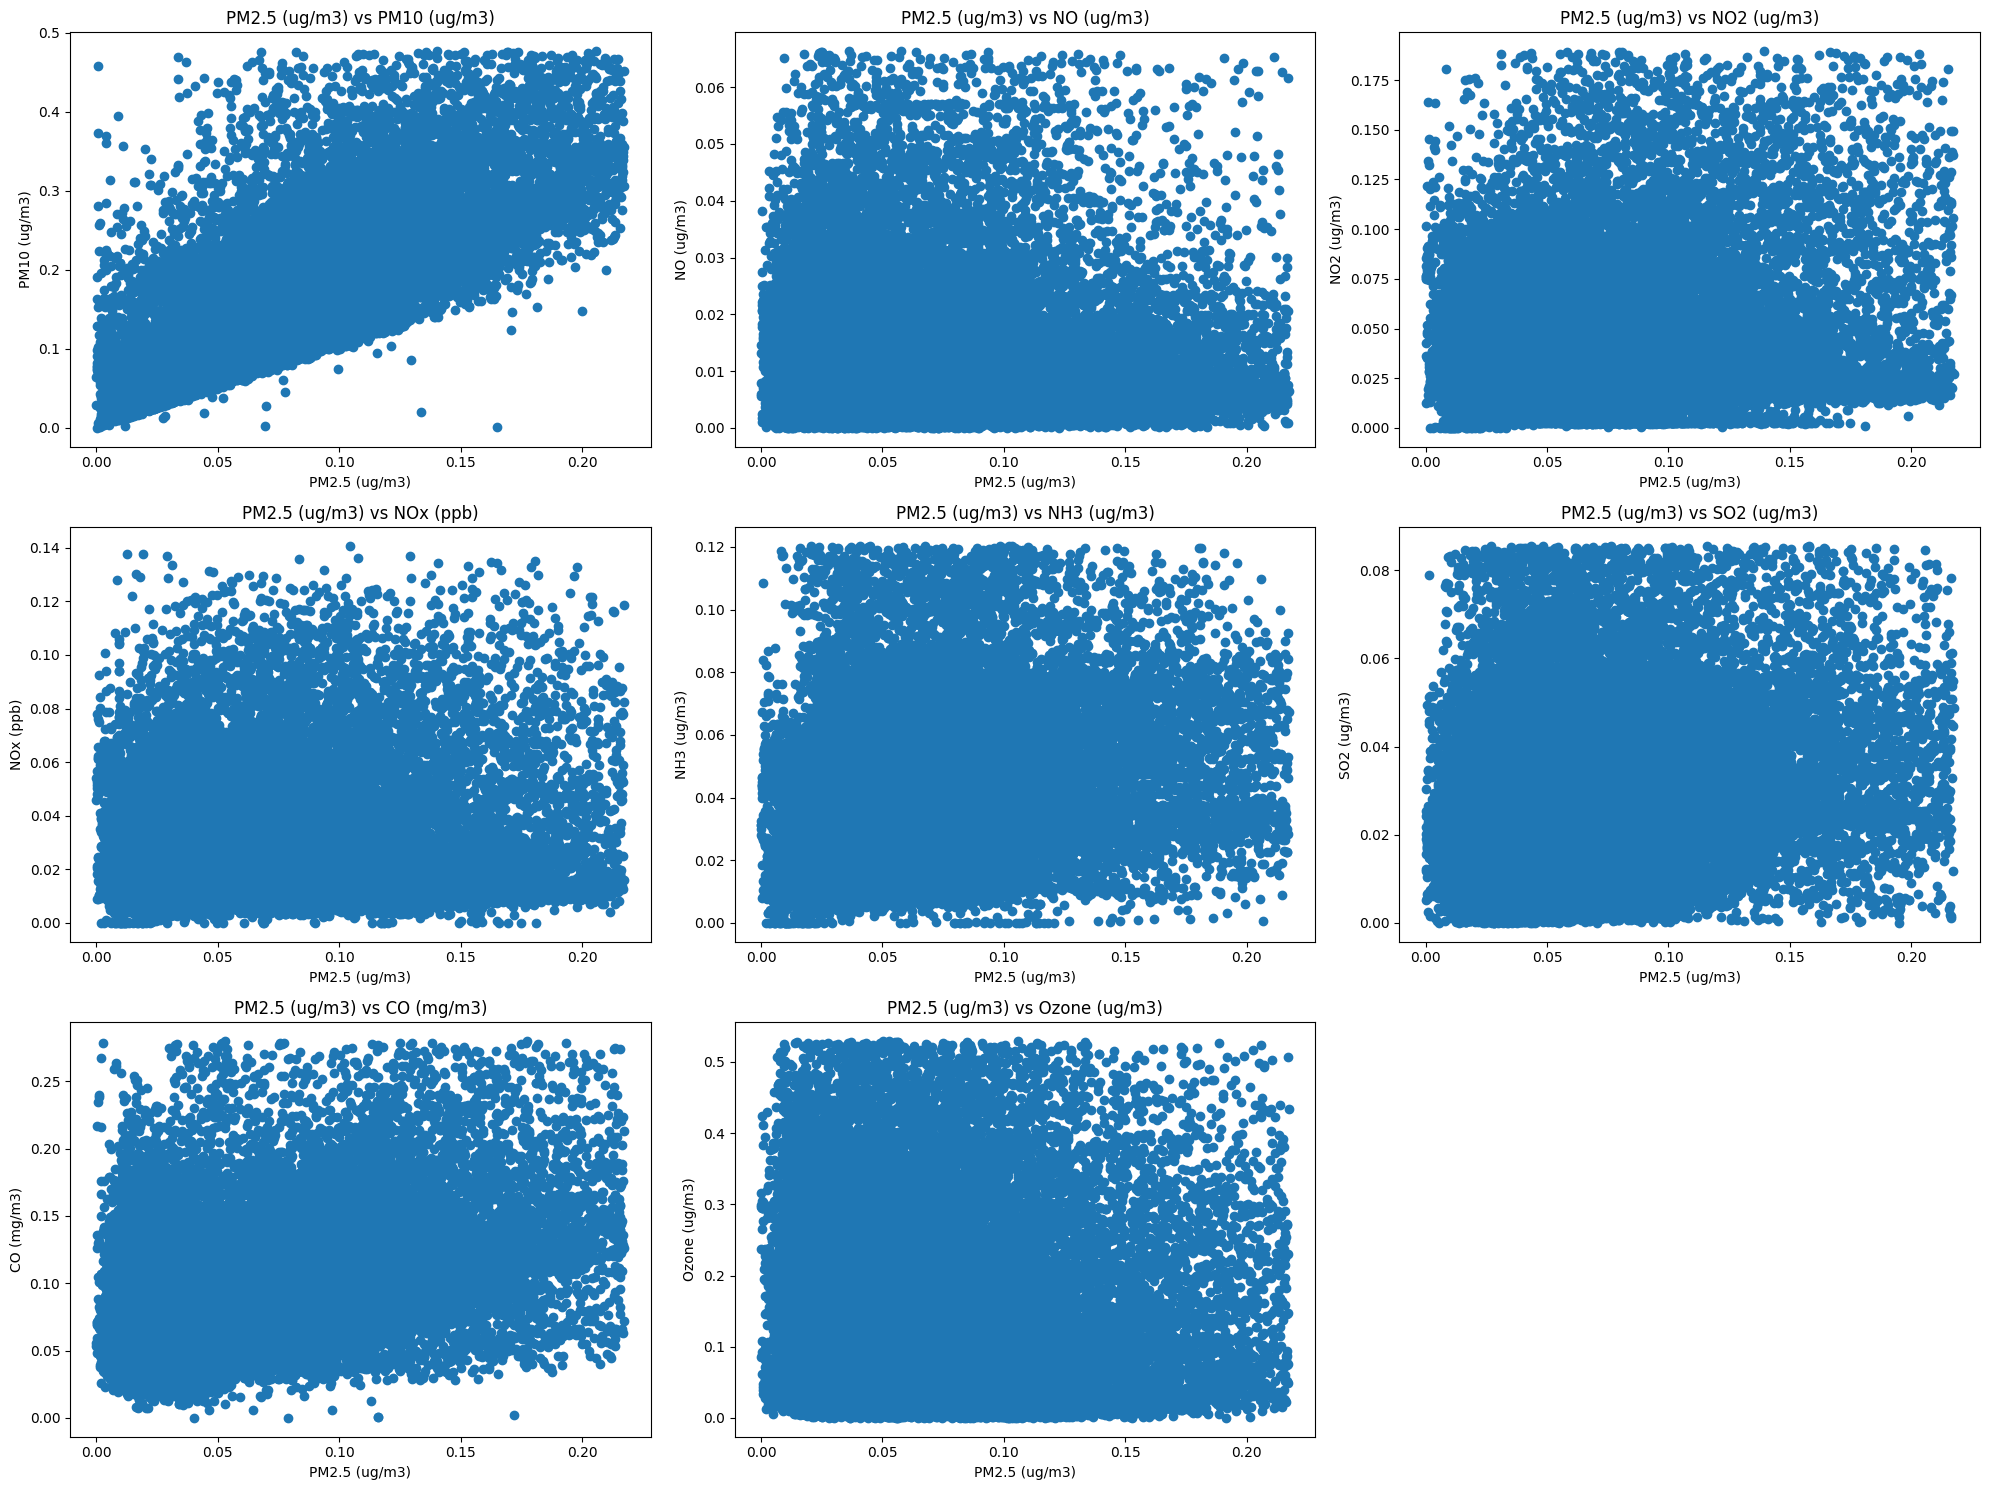

In [7]:
# Scatter plot between 'PM2.5' and other pollutants
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[2:10]):  # Selecting relevant pollutants
    plt.subplot(3, 3, i+1)
    plt.scatter(df['PM2.5 (ug/m3)'], df[column])
    plt.title(f'PM2.5 (ug/m3) vs {column}')
    plt.xlabel('PM2.5 (ug/m3)')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


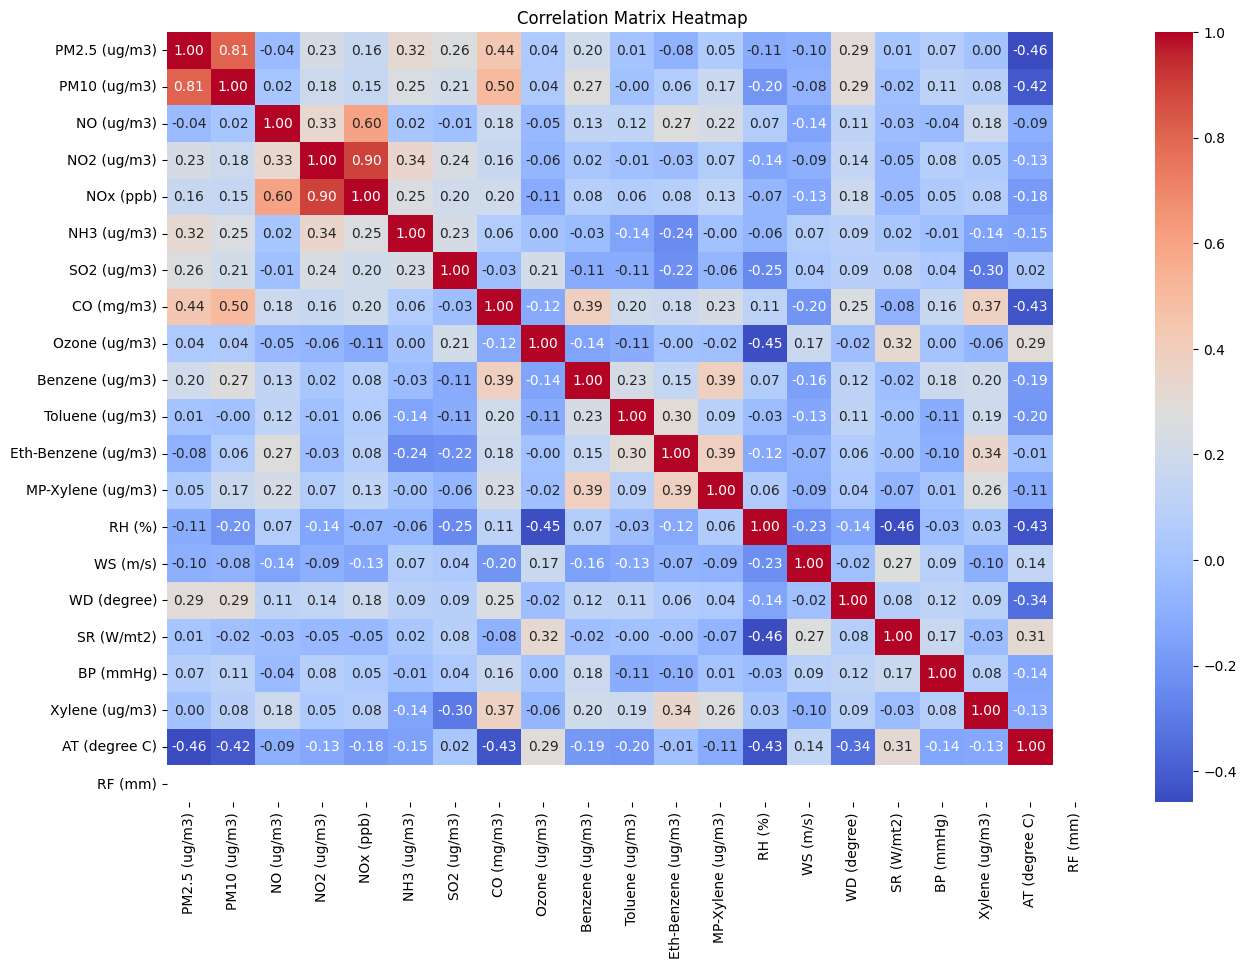

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numerical columns (like the date column) from the DataFrame
df_numerical = df.select_dtypes(include=[np.number])  # This keeps only numerical columns

# Compute the correlation matrix
corr_matrix = df_numerical.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0164 - val_loss: 0.0093
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0092 - val_loss: 0.0069
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0077 - val_loss: 0.0066
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0074 - val_loss: 0.0062
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0072 - val_loss: 0.0076
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0067 - val_loss: 0.0063
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0071 - val_loss: 0.0058
Epoch 8/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0070 - val_loss: 0.0059
Epoch 9/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0066 - val_loss: 0.0067
Epoch 10/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0064 - val_loss: 0.0064
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
MSE: 0.00027560024753270774
MAPE: 0.26039779963466725
RMSE: 0.016601

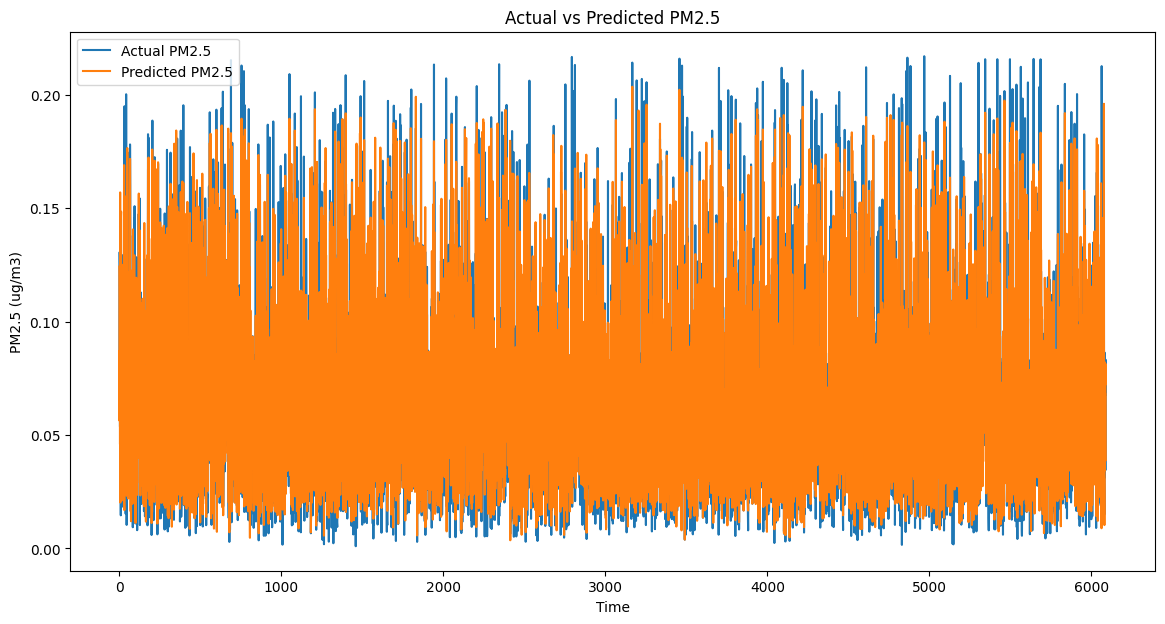

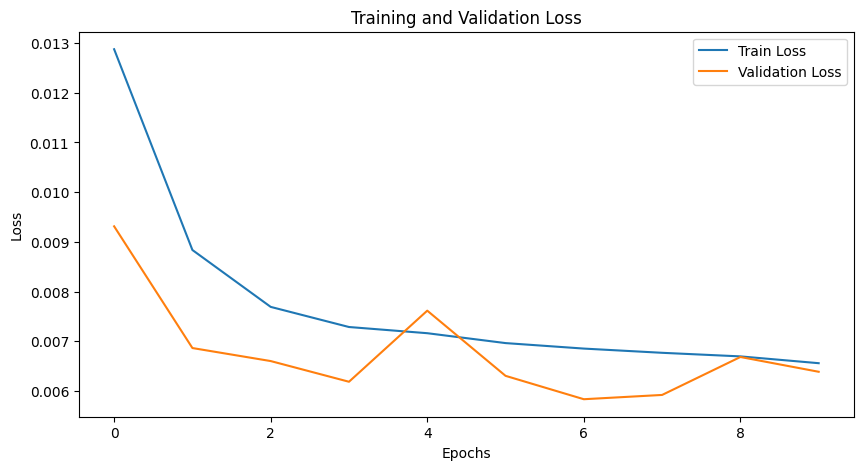

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format
df['From Date'] = pd.to_datetime(df['From Date'])

# Set 'From Date' as the index
df.set_index('From Date', inplace=True)

# Drop any rows with missing values
df.dropna(inplace=True)

# Features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Create lagged features for all pollutants
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Number of lagged time steps
n_lags = 3

# Create lagged features
df_lagged = create_lagged_features(df, features, target, n_lags)

# Extract features and target
X_data = df_lagged[features + [f'{feature}_lag_{lag}' for feature in features + [target] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target].values

# Scale features and target separately
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Prepare data for LSTM
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

# Sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape X for LSTM (batch_size, timesteps, features)
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    Dropout(0.2),  # Dropout layer to prevent overfitting
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(25),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform to get actual values
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0209 - val_loss: 0.0071
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0094 - val_loss: 0.0071
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0084 - val_loss: 0.0066
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0074 - val_loss: 0.0060
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0073 - val_loss: 0.0060
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0071 - val_loss: 0.0058
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0071 - val_loss: 0.0059
Epoch 8/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0069 - val_loss: 0.0061
Epoch 9/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0072 - val_loss: 0.0064
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
MSE: 0.0002752995498156698
MAPE: 0.2553629085344157
RMSE: 0.016592153260371896
R2: 0.8623605983913435
WAPE: 0.15838387848631513


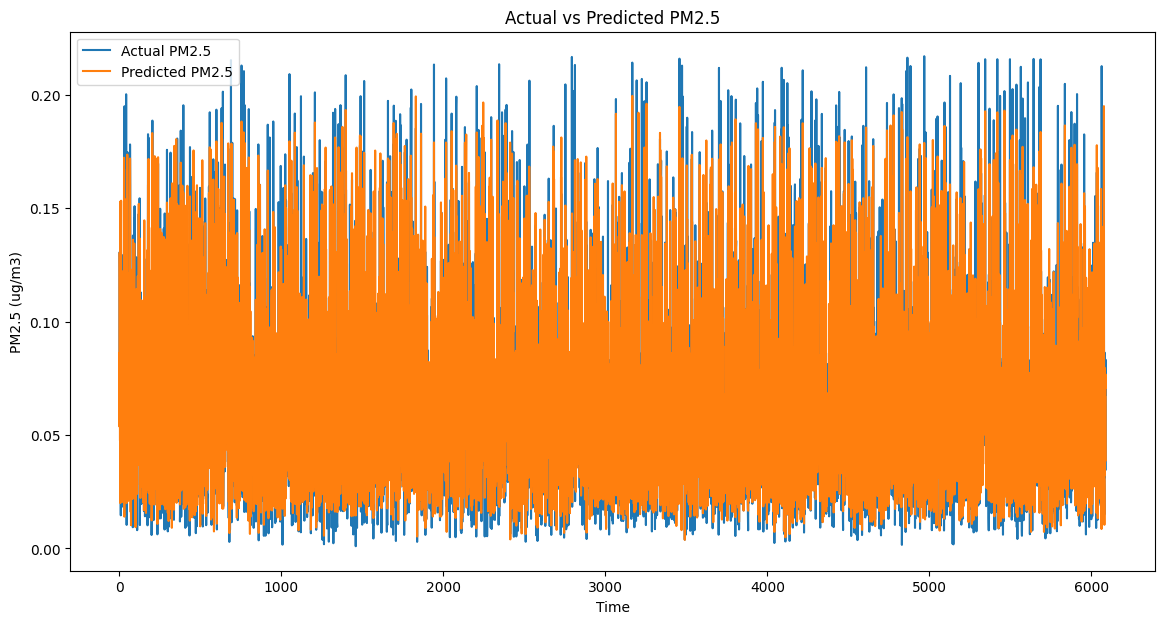

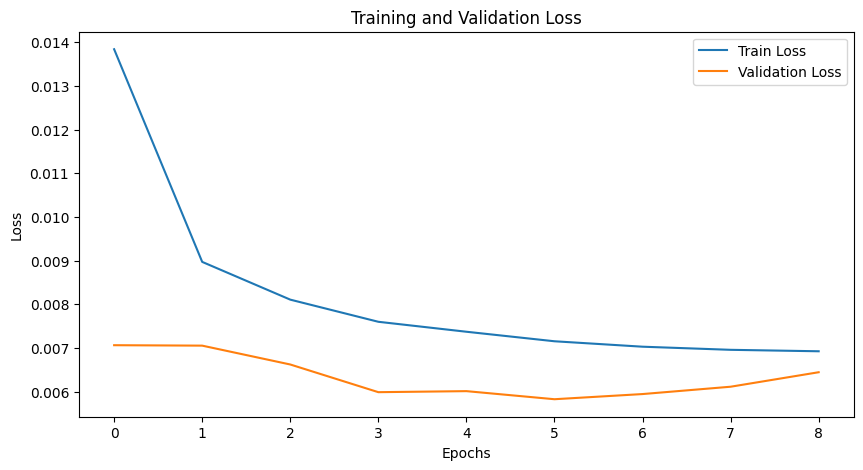

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format
df['From Date'] = pd.to_datetime(df['From Date'])

# Set 'From Date' as the index
df.set_index('From Date', inplace=True)

# Drop any rows with missing values
df.dropna(inplace=True)

# Features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Create lagged features for all pollutants
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Number of lagged time steps
n_lags = 3

# Create lagged features
df_lagged = create_lagged_features(df, features, target, n_lags)

# Extract features and target
X_data = df_lagged[features + [f'{feature}_lag_{lag}' for feature in features + [target] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target].values

# Scale features and target separately
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Prepare data for GRU
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

# Sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape X for GRU (batch_size, timesteps, features)
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the GRU model
model = Sequential([
    GRU(100, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    Dropout(0.2),  # Dropout layer to prevent overfitting
    GRU(50, return_sequences=True),
    Dropout(0.2),
    GRU(25),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform to get actual values
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0155 - val_loss: 0.0075
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0087 - val_loss: 0.0065
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0077 - val_loss: 0.0066
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0071 - val_loss: 0.0060
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0072 - val_loss: 0.0064
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0065 - val_loss: 0.0060
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0064 - val_loss: 0.0066
Epoch 8/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 9/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0067 - val_loss: 0.0057
Epoch 10/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 11/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0061 - val_loss: 0.0061
Epoch 12

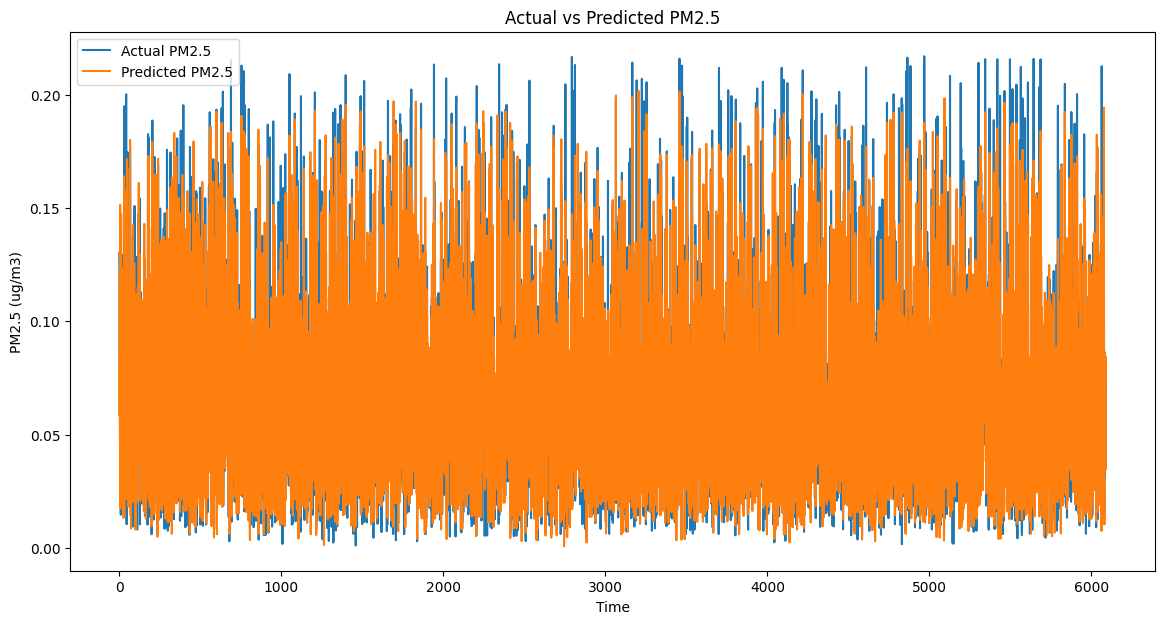

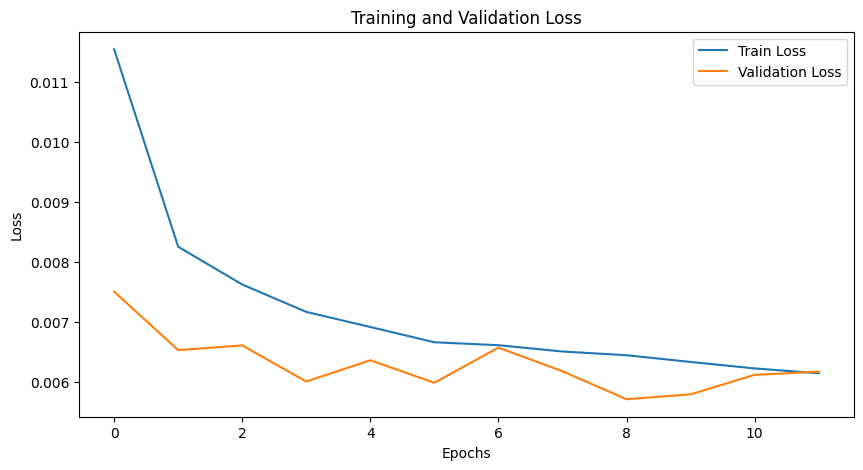

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format
df['From Date'] = pd.to_datetime(df['From Date'])

# Set 'From Date' as the index
df.set_index('From Date', inplace=True)

# Drop any rows with missing values
df.dropna(inplace=True)

# Features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Create lagged features for all pollutants
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Number of lagged time steps
n_lags = 3

# Create lagged features
df_lagged = create_lagged_features(df, features, target, n_lags)

# Extract features and target
X_data = df_lagged[features + [f'{feature}_lag_{lag}' for feature in features + [target] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target].values

# Scale features and target separately
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Prepare data for BiLSTM
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

# Sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape X for BiLSTM (batch_size, timesteps, features)
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the BiLSTM model
model = Sequential([
    Bidirectional(LSTM(100, return_sequences=True), input_shape=(seq_length, X.shape[2])),
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Bidirectional(LSTM(50, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(25)),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform to get actual values
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50
  24/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 1.0448 

W0000 00:00:1723720244.068261     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1523/1523 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0904

W0000 00:00:1723720273.787048     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723720275.465568     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1523/1523 ━━━━━━━━━━━━━━━━━━━━ 63s 22ms/step - loss: 0.0904 - val_loss: 0.0102
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0141 - val_loss: 0.0104
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0129 - val_loss: 0.0098
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0122 - val_loss: 0.0101
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0224 - val_loss: 0.0128
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0152 - val_loss: 0.0147
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0190 - val_loss: 0.0112
Epoch 8/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0171 - val_loss: 0.0116
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
MSE: 0.00046455373814083685
MAPE: 0.3667457478090828
RMSE: 0.02155350871994713
R2: 0.7677406353349225
WAPE: 0.23900957218870858


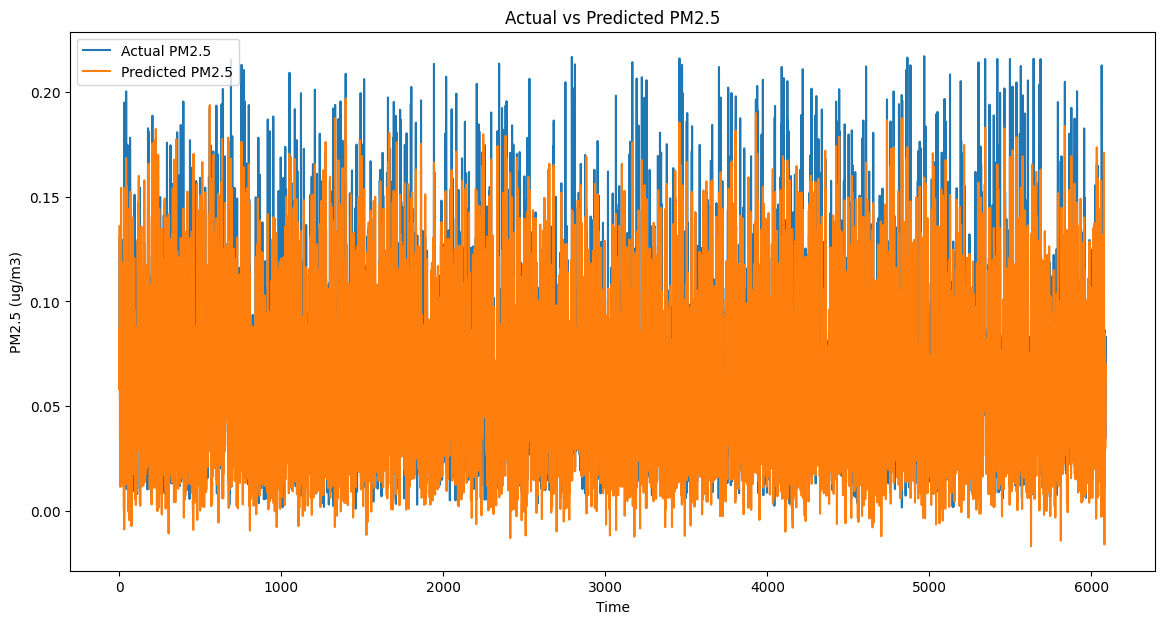

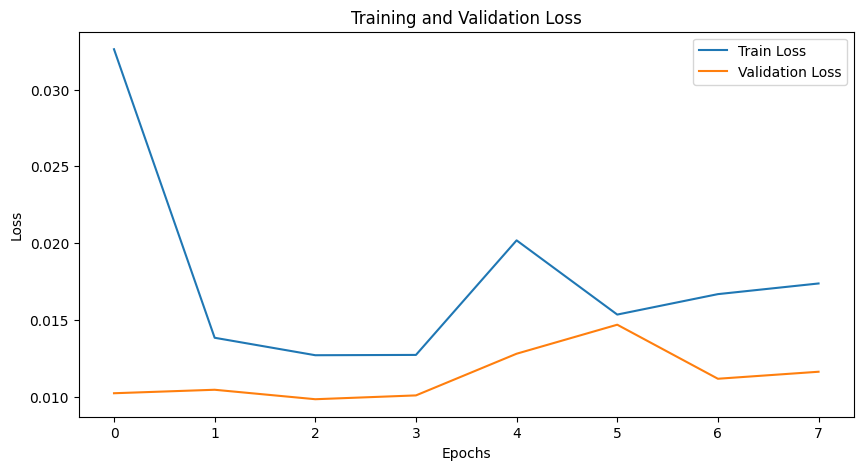

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format
df['From Date'] = pd.to_datetime(df['From Date'])

# Set 'From Date' as the index
df.set_index('From Date', inplace=True)

# Drop any rows with missing values
df.dropna(inplace=True)

# Features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Create lagged features for all pollutants
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Number of lagged time steps
n_lags = 3

# Create lagged features
df_lagged = create_lagged_features(df, features, target, n_lags)

# Extract features and target
X_data = df_lagged[features + [f'{feature}_lag_{lag}' for feature in features + [target] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target].values

# Scale features and target separately
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Prepare data for Transformer
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

# Sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape X for Transformer (batch_size, timesteps, features)
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformer Model Components
def transformer_block(x, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x_normalized = LayerNormalization(epsilon=1e-6)(x)
    x_attention = MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x_normalized, x_normalized)
    x_attention = Dropout(dropout)(x_attention)
    x_add = Add()([x_attention, x])
    
    # Feed Forward Part
    x_ffn = Dense(ff_dim, activation="relu")(x_add)
    x_ffn = Dropout(dropout)(x_ffn)
    x_ffn = Dense(x.shape[-1])(x_ffn)
    
    return Add()([x_ffn, x_add])

def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = Input(shape=input_shape)
    x = inputs
    
    for _ in range(num_transformer_blocks):
        x = transformer_block(x, head_size, num_heads, ff_dim, dropout)
        
    x = GlobalAveragePooling1D()(x)
    
    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)
        
    outputs = Dense(1)(x)
    
    return Model(inputs, outputs)

# Define model parameters
input_shape = (seq_length, X.shape[2])
head_size = 256
num_heads = 4
ff_dim = 4
num_transformer_blocks = 4
mlp_units = [128]
dropout = 0.1
mlp_dropout = 0.4

# Build the model
model = build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout, mlp_dropout)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform to get actual values
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - loss: 0.1065 - val_loss: 0.0171
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0203 - val_loss: 0.0110
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0133 - val_loss: 0.0096
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0099 - val_loss: 0.0075
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0087 - val_loss: 0.0077
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0081 - val_loss: 0.0109
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0083 - val_loss: 0.0066
Epoch 8/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0076 - val_loss: 0.0066
Epoch 9/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0076 - val_loss: 0.0062
Epoch 10/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0069 - val_loss: 0.0062
Epoch 11/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0069 - val_loss: 0.0067
Epoch 12

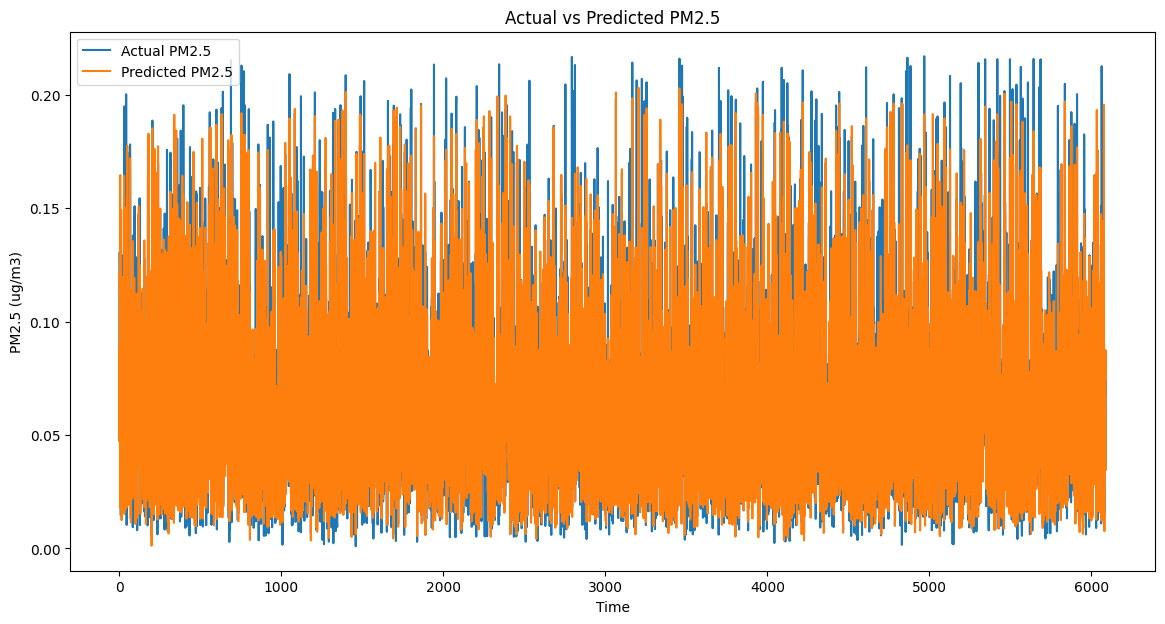

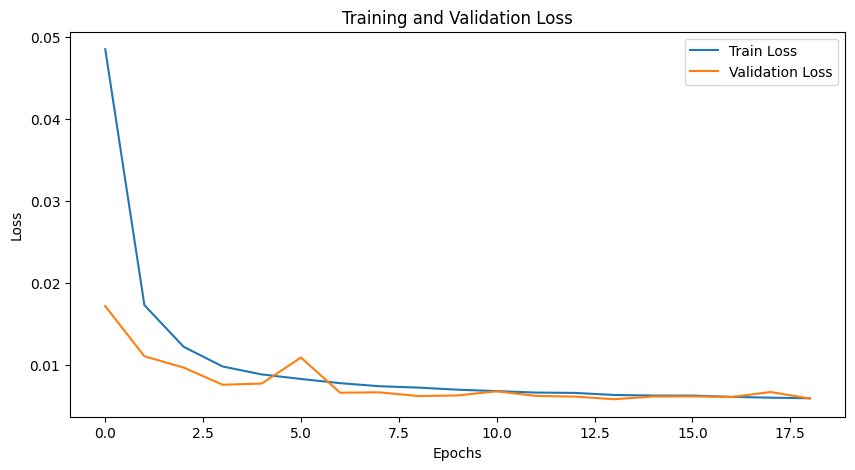

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, ConvLSTM2D, Conv3D, BatchNormalization, Dense, TimeDistributed, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format
df['From Date'] = pd.to_datetime(df['From Date'])

# Set 'From Date' as the index
df.set_index('From Date', inplace=True)

# Drop any rows with missing values
df.dropna(inplace=True)

# Features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Create lagged features for all pollutants
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Number of lagged time steps
n_lags = 3

# Create lagged features
df_lagged = create_lagged_features(df, features, target, n_lags)

# Extract features and target
X_data = df_lagged[features + [f'{feature}_lag_{lag}' for feature in features + [target] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target].values

# Scale features and target separately
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Prepare data for ConvLSTM
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

# Sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape X for ConvLSTM (batch_size, timesteps, height, width, channels)
X = X.reshape((X.shape[0], seq_length, 1, 1, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ConvLSTM Model
def build_convlstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = ConvLSTM2D(filters=32, kernel_size=(1, 1), padding='same', return_sequences=True)(inputs)
    x = BatchNormalization()(x)
    x = ConvLSTM2D(filters=64, kernel_size=(1, 1), padding='same', return_sequences=True)(x)
    x = BatchNormalization()(x)
    x = ConvLSTM2D(filters=128, kernel_size=(1, 1), padding='same', return_sequences=False)(x)
    x = BatchNormalization()(x)
    x = Flatten()(x)
    x = Dense(50, activation='relu')(x)
    x = Dense(1)(x)
    
    model = Model(inputs, x)
    return model

# Define model parameters
input_shape = (seq_length, 1, 1, X.shape[4])

# Build the model
model = build_convlstm_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform to get actual values
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0163 - val_loss: 0.0069
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0086 - val_loss: 0.0063
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0079 - val_loss: 0.0063
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0075 - val_loss: 0.0061
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0074 - val_loss: 0.0062
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0070 - val_loss: 0.0059
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0070 - val_loss: 0.0058
Epoch 8/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0072 - val_loss: 0.0061
Epoch 9/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0069 - val_loss: 0.0060
Epoch 10/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0068 - val_loss: 0.0059
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
MSE: 0.0002753807927634946
MAPE: 0.27615459047772745
RMSE: 0.0165946

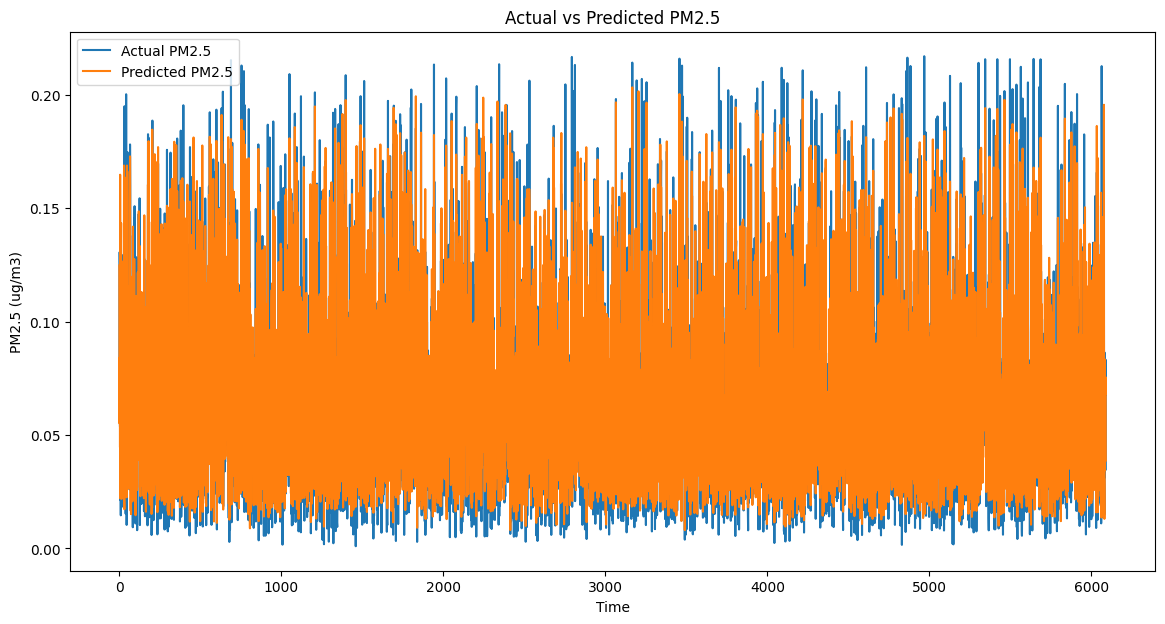

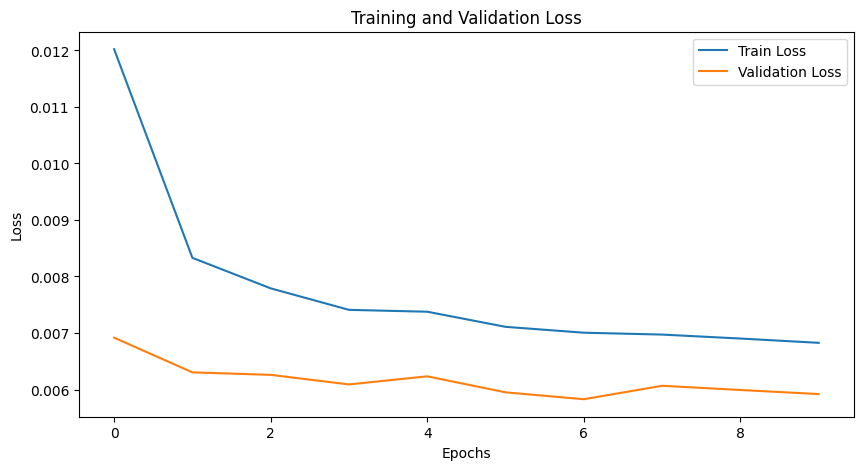

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format
df['From Date'] = pd.to_datetime(df['From Date'])

# Set 'From Date' as the index
df.set_index('From Date', inplace=True)

# Drop any rows with missing values
df.dropna(inplace=True)

# Features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Create lagged features for all pollutants
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Number of lagged time steps
n_lags = 3

# Create lagged features
df_lagged = create_lagged_features(df, features, target, n_lags)

# Extract features and target
X_data = df_lagged[features + [f'{feature}_lag_{lag}' for feature in features + [target] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target].values

# Scale features and target separately
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Prepare data for LSTM and GRU
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

# Sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape X for LSTM and GRU (batch_size, timesteps, features)
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM and GRU models
def build_lstm_gru_ensemble(input_shape):
    inputs = Input(shape=input_shape)
    
    # LSTM branch
    x_lstm = LSTM(64, return_sequences=True)(inputs)
    x_lstm = Dropout(0.2)(x_lstm)
    x_lstm = LSTM(32)(x_lstm)
    
    # GRU branch
    x_gru = GRU(64, return_sequences=True)(inputs)
    x_gru = Dropout(0.2)(x_gru)
    x_gru = GRU(32)(x_gru)
    
    # Concatenate LSTM and GRU outputs
    x = concatenate([x_lstm, x_gru])
    
    x = Dense(50, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1)(x)
    
    model = Model(inputs, outputs)
    return model

# Define model parameters
input_shape = (seq_length, X.shape[2])

# Build the ensemble model
model = build_lstm_gru_ensemble(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform to get actual values
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - loss: 0.0382 - val_loss: 0.0105
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - loss: 0.0125 - val_loss: 0.0106
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - loss: 0.0100 - val_loss: 0.0091
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - loss: 0.0096 - val_loss: 0.0109
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - loss: 0.0092 - val_loss: 0.0095
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - loss: 0.0088 - val_loss: 0.0087
Epoch 8/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - loss: 0.0084 - val_loss: 0.0103
Epoch 9/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - loss: 0.0084 - val_loss: 0.0091
Epoch 10/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - loss: 0.0088 - val_loss: 0.0088
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
MSE: 0.00040821644329814714
MAPE: 0.36681896236092737
RMSE

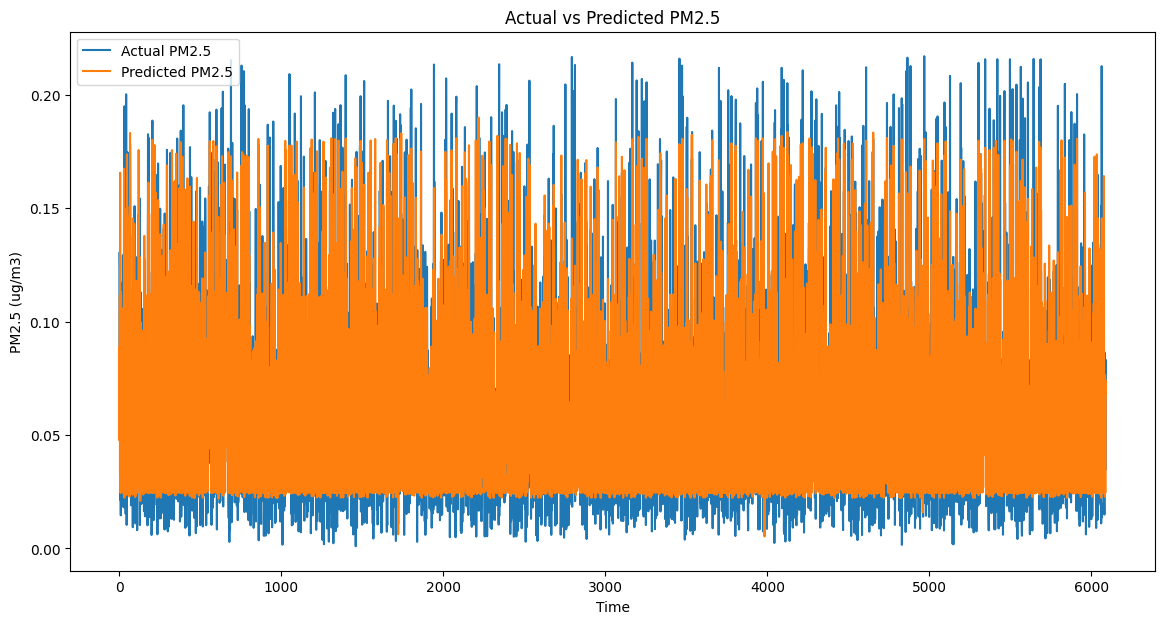

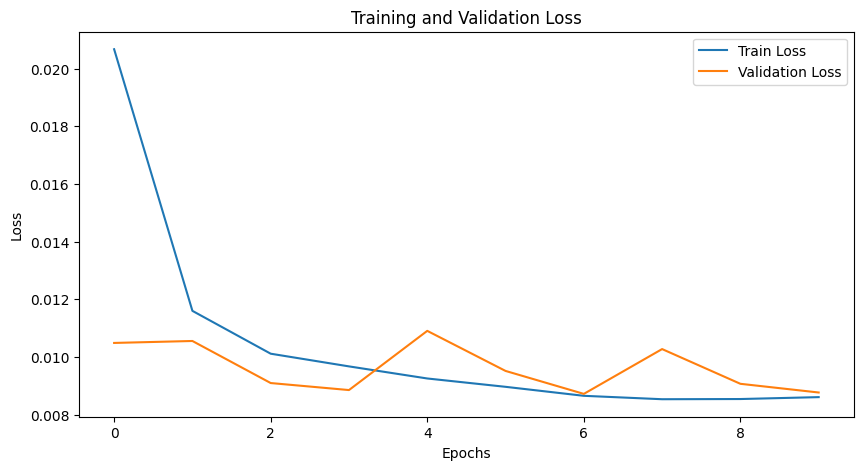

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, LayerNormalization, MultiHeadAttention, Add, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format
df['From Date'] = pd.to_datetime(df['From Date'])

# Set 'From Date' as the index
df.set_index('From Date', inplace=True)

# Drop any rows with missing values
df.dropna(inplace=True)

# Features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Create lagged features for all pollutants
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Number of lagged time steps
n_lags = 3

# Create lagged features
df_lagged = create_lagged_features(df, features, target, n_lags)

# Extract features and target
X_data = df_lagged[features + [f'{feature}_lag_{lag}' for feature in features + [target] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target].values

# Scale features and target separately
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Prepare data for Transformer-LSTM model
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

# Sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape X for Transformer-LSTM (batch_size, timesteps, features)
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformer-LSTM Model Components
def transformer_block(x, head_size, num_heads, ff_dim, dropout=0):
    x_normalized = LayerNormalization(epsilon=1e-6)(x)
    x_attention = MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x_normalized, x_normalized)
    x_attention = Dropout(dropout)(x_attention)
    x_add = Add()([x_attention, x])
    x_ffn = Dense(ff_dim, activation="relu")(x_add)
    x_ffn = Dropout(dropout)(x_ffn)
    x_ffn = Dense(x.shape[-1])(x_ffn)
    return Add()([x_ffn, x_add])

def build_transformer_lstm_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, lstm_units, dropout=0, lstm_dropout=0):
    inputs = Input(shape=input_shape)
    x = inputs
    
    # Transformer blocks
    for _ in range(num_transformer_blocks):
        x = transformer_block(x, head_size, num_heads, ff_dim, dropout)
    
    # LSTM layer
    x = LSTM(lstm_units, return_sequences=False, dropout=lstm_dropout)(x)
    
    # Output layer
    outputs = Dense(1)(x)
    
    return Model(inputs, outputs)

# Define model parameters
input_shape = (seq_length, X.shape[2])
head_size = 256
num_heads = 4
ff_dim = 4
num_transformer_blocks = 4
lstm_units = 50
dropout = 0.1
lstm_dropout = 0.4

# Build the model
model = build_transformer_lstm_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, lstm_units, dropout, lstm_dropout)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform to get actual values
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0168 - val_loss: 0.0088
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0106 - val_loss: 0.0081
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0096 - val_loss: 0.0077
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0090 - val_loss: 0.0074
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0086 - val_loss: 0.0077
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0081 - val_loss: 0.0071
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0083 - val_loss: 0.0074
Epoch 8/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0081 - val_loss: 0.0074
Epoch 9/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0079 - val_loss: 0.0070
Epoch 10/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0077 - val_loss: 0.0067
Epoch 11/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0077 - val_loss: 0.0067
Epoch 12/50
1523/1523 ━━━━━━━

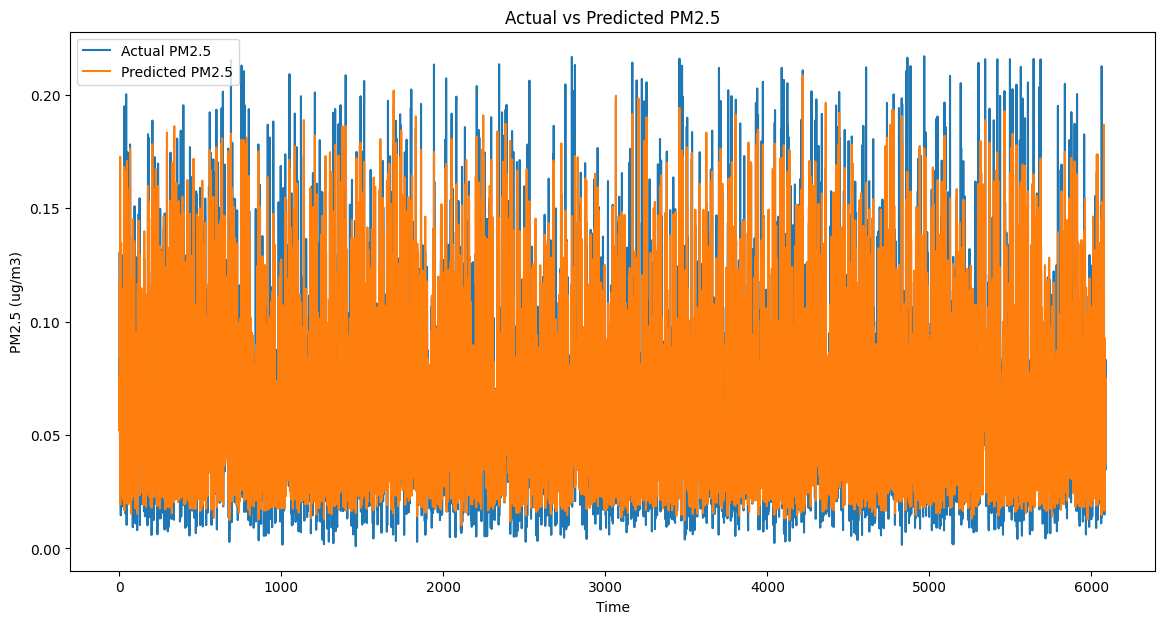

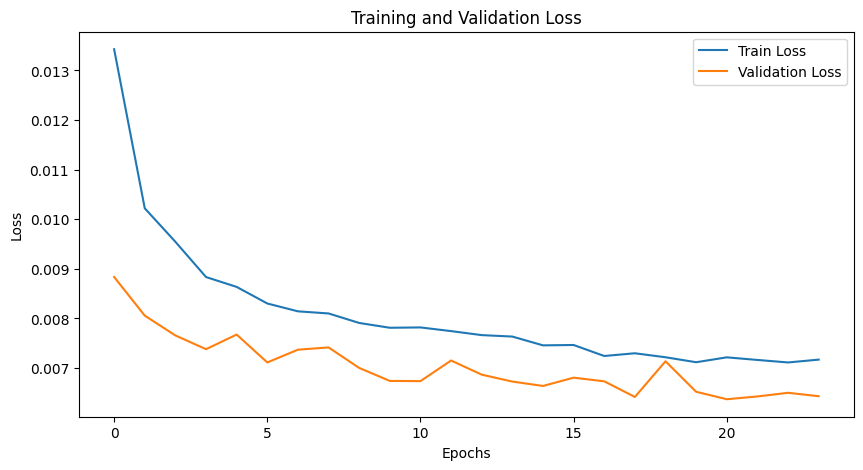

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format
df['From Date'] = pd.to_datetime(df['From Date'])

# Set 'From Date' as the index
df.set_index('From Date', inplace=True)

# Drop any rows with missing values
df.dropna(inplace=True)

# Features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Create lagged features for all pollutants
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Number of lagged time steps
n_lags = 3

# Create lagged features
df_lagged = create_lagged_features(df, features, target, n_lags)

# Extract features and target
X_data = df_lagged[features + [f'{feature}_lag_{lag}' for feature in features + [target] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target].values

# Scale features and target separately
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Prepare data for Conv1D-LSTM model
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

# Sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape X for Conv1D-LSTM (batch_size, timesteps, features)
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conv1D-LSTM Model
def build_conv_lstm_model(input_shape, conv_filters, kernel_size, lstm_units, dropout=0):
    inputs = Input(shape=input_shape)
    
    # Conv1D layer
    x = Conv1D(filters=conv_filters, kernel_size=kernel_size, activation='relu')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(dropout)(x)
    
    # LSTM layer
    x = LSTM(lstm_units, return_sequences=False)(x)
    x = Dropout(dropout)(x)
    
    # Output layer
    outputs = Dense(1)(x)
    
    return Model(inputs, outputs)

# Define model parameters
input_shape = (seq_length, X.shape[2])
conv_filters = 64
kernel_size = 3
lstm_units = 50
dropout = 0.2

# Build the model
model = build_conv_lstm_model(input_shape, conv_filters, kernel_size, lstm_units, dropout)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform to get actual values
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0182 - val_loss: 0.0094
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0105 - val_loss: 0.0084
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0104 - val_loss: 0.0083
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0095 - val_loss: 0.0098
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0088 - val_loss: 0.0080
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0089 - val_loss: 0.0076
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 8/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0084 - val_loss: 0.0075
Epoch 9/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0082 - val_loss: 0.0073
Epoch 10/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0084 - val_loss: 0.0072
Epoch 11/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0082 - val_loss: 0.0073
Epoch 12/50
1523/1523 ━━━━━━━━

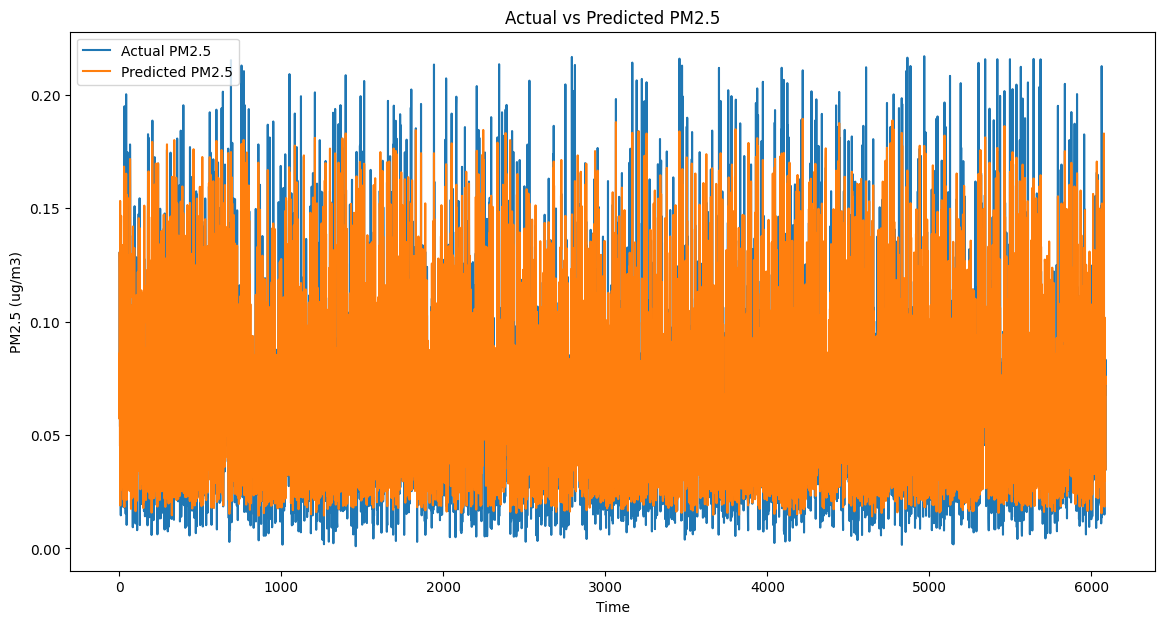

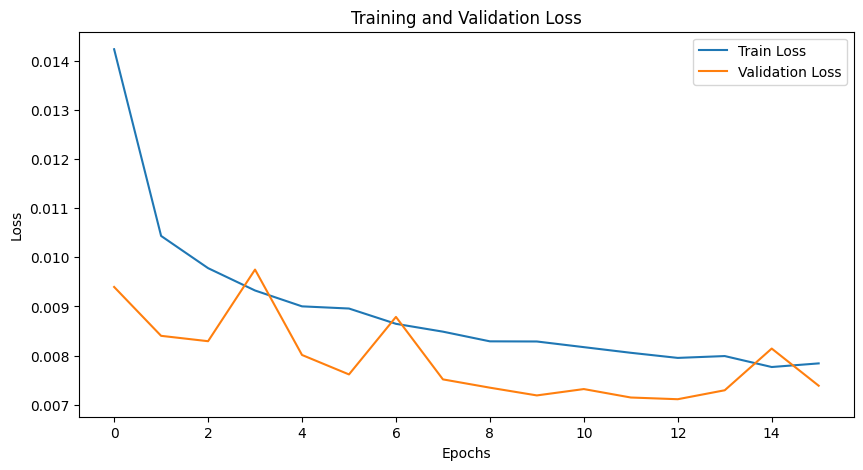

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, GRU, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format
df['From Date'] = pd.to_datetime(df['From Date'])

# Set 'From Date' as the index
df.set_index('From Date', inplace=True)

# Drop any rows with missing values
df.dropna(inplace=True)

# Features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Create lagged features for all pollutants
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Number of lagged time steps
n_lags = 3

# Create lagged features
df_lagged = create_lagged_features(df, features, target, n_lags)

# Extract features and target
X_data = df_lagged[features + [f'{feature}_lag_{lag}' for feature in features + [target] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target].values

# Scale features and target separately
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Prepare data for Conv1D-GRU model
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

# Sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape X for Conv1D-GRU (batch_size, timesteps, features)
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conv1D-GRU Model
def build_conv_gru_model(input_shape, conv_filters, kernel_size, gru_units, dropout=0):
    inputs = Input(shape=input_shape)
    
    # Conv1D layer
    x = Conv1D(filters=conv_filters, kernel_size=kernel_size, activation='relu')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(dropout)(x)
    
    # GRU layer
    x = GRU(gru_units, return_sequences=False)(x)
    x = Dropout(dropout)(x)
    
    # Output layer
    outputs = Dense(1)(x)
    
    return Model(inputs, outputs)

# Define model parameters
input_shape = (seq_length, X.shape[2])
conv_filters = 64
kernel_size = 3
gru_units = 50
dropout = 0.2

# Build the model
model = build_conv_gru_model(input_shape, conv_filters, kernel_size, gru_units, dropout)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform to get actual values
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0156 - val_loss: 0.0072
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0085 - val_loss: 0.0068
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0077 - val_loss: 0.0062
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0076 - val_loss: 0.0071
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0072 - val_loss: 0.0061
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0067 - val_loss: 0.0060
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0067 - val_loss: 0.0061
Epoch 8/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0069 - val_loss: 0.0059
Epoch 9/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0065 - val_loss: 0.0061
Epoch 10/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0065 - val_loss: 0.0060
Epoch 11/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0066 - val_loss: 0.0059
191/191 ━━━━━━━━━━━

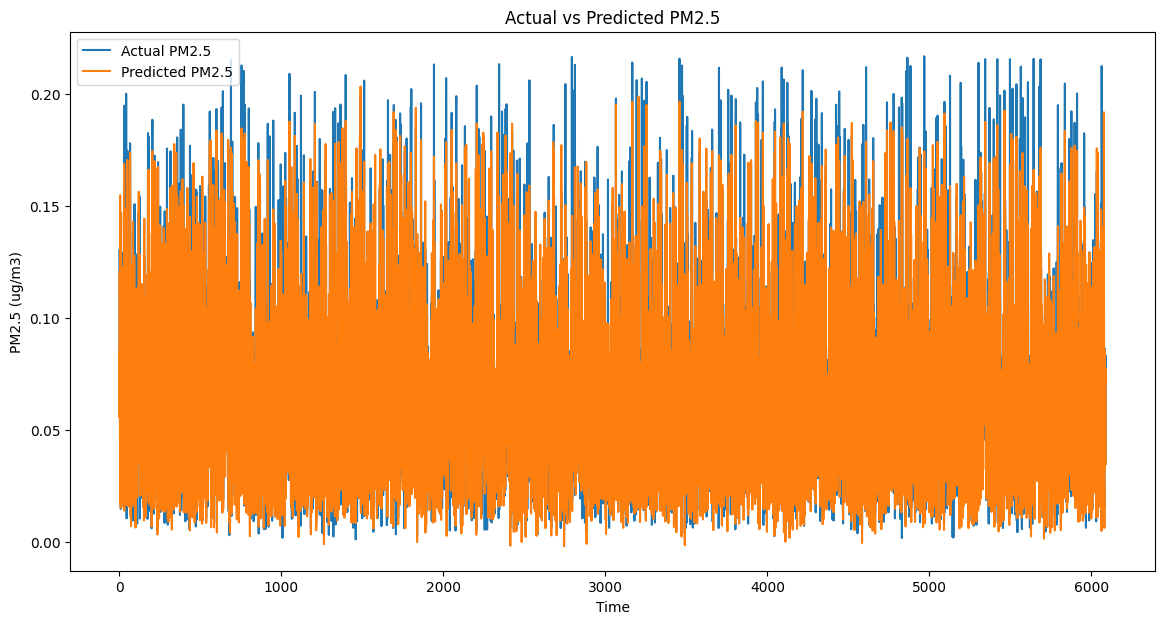

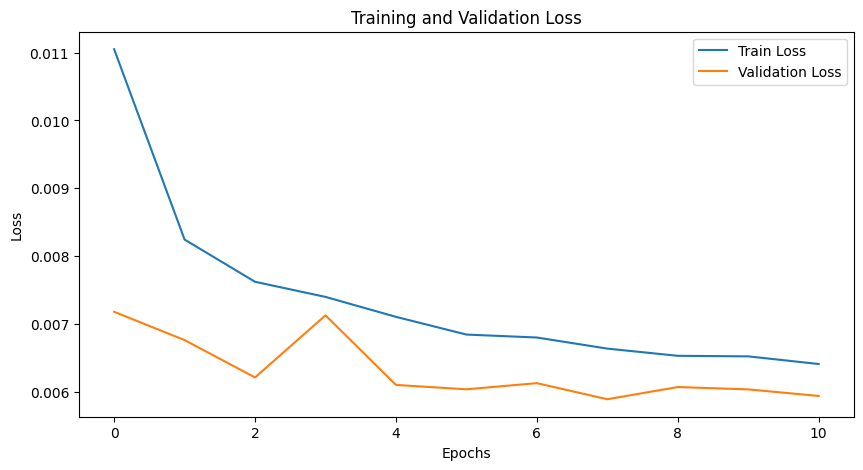

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format
df['From Date'] = pd.to_datetime(df['From Date'])

# Set 'From Date' as the index
df.set_index('From Date', inplace=True)

# Drop any rows with missing values
df.dropna(inplace=True)

# Features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Create lagged features for all pollutants
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Number of lagged time steps
n_lags = 3

# Create lagged features
df_lagged = create_lagged_features(df, features, target, n_lags)

# Extract features and target
X_data = df_lagged[features + [f'{feature}_lag_{lag}' for feature in features + [target] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target].values

# Scale features and target separately
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Prepare data for BiLSTM-GRU model
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

# Sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape X for BiLSTM-GRU (batch_size, timesteps, features)
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# BiLSTM-GRU Model
def build_bilstm_gru_model(input_shape, lstm_units, gru_units, dropout=0):
    inputs = Input(shape=input_shape)
    
    # Bidirectional LSTM layer
    x = Bidirectional(LSTM(lstm_units, return_sequences=True))(inputs)
    x = Dropout(dropout)(x)
    
    # GRU layer
    x = GRU(gru_units, return_sequences=False)(x)
    x = Dropout(dropout)(x)
    
    # Output layer
    outputs = Dense(1)(x)
    
    return Model(inputs, outputs)

# Define model parameters
input_shape = (seq_length, X.shape[2])
lstm_units = 50
gru_units = 50
dropout = 0.2

# Build the model
model = build_bilstm_gru_model(input_shape, lstm_units, gru_units, dropout)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform to get actual values
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Epoch 1/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0129 - val_loss: 0.0066
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0070 - val_loss: 0.0054
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0062 - val_loss: 0.0057
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0060 - val_loss: 0.0053
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0059 - val_loss: 0.0055
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0055 - val_loss: 0.0059
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0056 - val_loss: 0.0050
Epoch 8/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 9/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 10/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0056 - val_loss: 0.0053
Epoch 11/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 12/50
1523/15

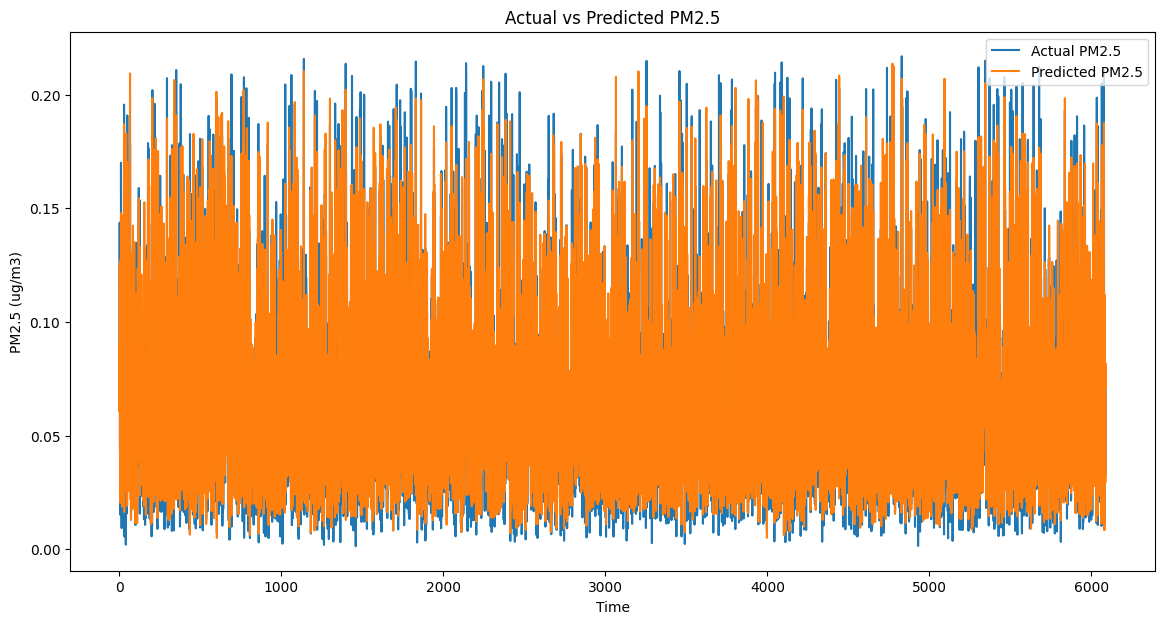

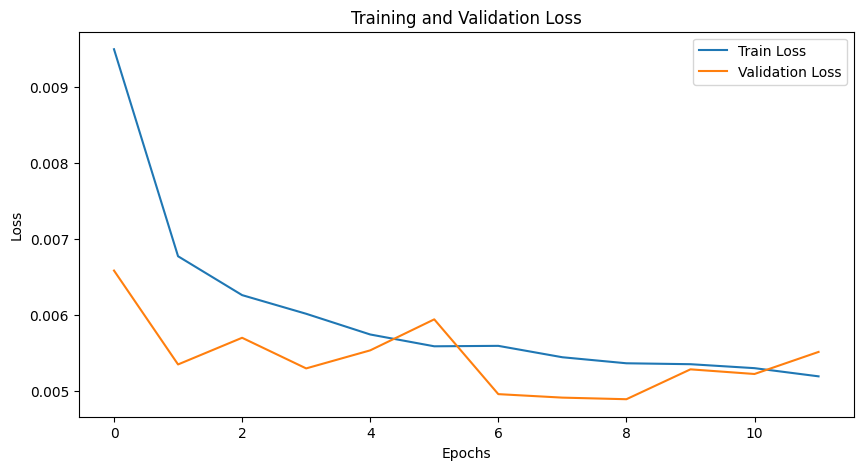

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format and set it as the index
df['From Date'] = pd.to_datetime(df['From Date'])
df.set_index('From Date', inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Apply exponential smoothing to the target variable
def apply_exponential_smoothing(series, trend='add', seasonal=None, seasonal_periods=None):
    model = ExponentialSmoothing(series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fit = model.fit()
    smoothed_series = fit.fittedvalues
    return smoothed_series

# Smooth the target variable
df[target + '_smoothed'] = apply_exponential_smoothing(df[target], trend='add')

# Create lagged features
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Define number of lagged time steps
n_lags = 3

# Create lagged features and prepare dataset
df_lagged = create_lagged_features(df, features, target + '_smoothed', n_lags)
X_data = df_lagged[[f'{feature}_lag_{lag}' for feature in features + [target + "_smoothed"] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target + '_smoothed'].values

# Scale features and target
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create sequences
seq_length = 10
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape for model input
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the BiLSTM-GRU model
def build_bilstm_gru_model(input_shape, lstm_units, gru_units, dropout=0.2):
    inputs = Input(shape=input_shape)
    x = Bidirectional(LSTM(lstm_units, return_sequences=True))(inputs)
    x = Dropout(dropout)(x)
    x = GRU(gru_units, return_sequences=False)(x)
    x = Dropout(dropout)(x)
    outputs = Dense(1)(x)
    return Model(inputs, outputs)

# Define model parameters
input_shape = (seq_length, X.shape[2])
lstm_units = 50
gru_units = 50
dropout = 0.2

# Build and compile the model
model = build_bilstm_gru_model(input_shape, lstm_units, gru_units, dropout)
model.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions and inverse transform
y_pred_scaled = model.predict(X_test)
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Epoch 1/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0148 - val_loss: 0.0071
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0076 - val_loss: 0.0059
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0068 - val_loss: 0.0052
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0060 - val_loss: 0.0054
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0058 - val_loss: 0.0051
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0058 - val_loss: 0.0050
Epoch 8/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 9/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0058 - val_loss: 0.0049
Epoch 10/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 11/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 12/50
1523/1523 ━━━━━━━

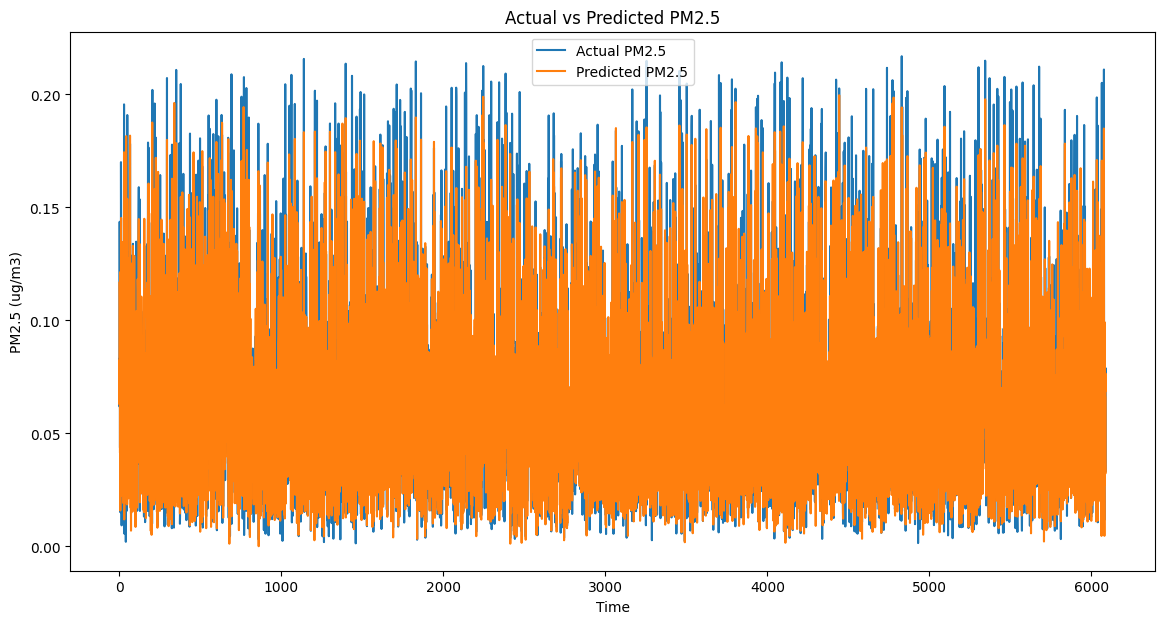

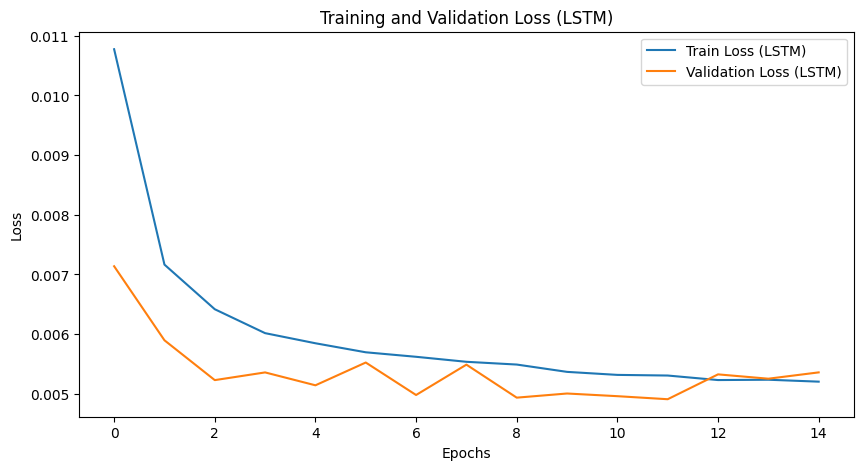

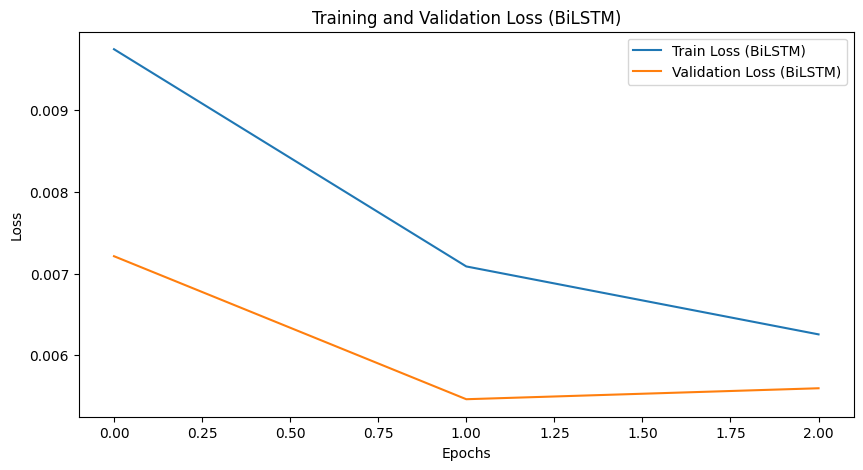

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format and set it as the index
df['From Date'] = pd.to_datetime(df['From Date'])
df.set_index('From Date', inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Apply exponential smoothing to the target variable
def apply_exponential_smoothing(series, trend='add', seasonal=None, seasonal_periods=None):
    model = ExponentialSmoothing(series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fit = model.fit()
    smoothed_series = fit.fittedvalues
    return smoothed_series

# Smooth the target variable
df[target + '_smoothed'] = apply_exponential_smoothing(df[target], trend='add')

# Create lagged features
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Define number of lagged time steps
n_lags = 3

# Create lagged features and prepare dataset
df_lagged = create_lagged_features(df, features, target + '_smoothed', n_lags)
X_data = df_lagged[[f'{feature}_lag_{lag}' for feature in features + [target + "_smoothed"] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target + '_smoothed'].values

# Scale features and target
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create sequences
seq_length = 10
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape for model input
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
def build_lstm_model(input_shape, lstm_units, dropout=0.2):
    inputs = Input(shape=input_shape)
    x = LSTM(lstm_units, return_sequences=True)(inputs)
    x = Dropout(dropout)(x)
    x = LSTM(lstm_units, return_sequences=False)(x)
    x = Dropout(dropout)(x)
    outputs = Dense(1)(x)
    return Model(inputs, outputs)

# Build the BiLSTM model
def build_bilstm_model(input_shape, lstm_units, dropout=0.2):
    inputs = Input(shape=input_shape)
    x = Bidirectional(LSTM(lstm_units, return_sequences=True))(inputs)
    x = Dropout(dropout)(x)
    x = LSTM(lstm_units, return_sequences=False)(x)
    x = Dropout(dropout)(x)
    outputs = Dense(1)(x)
    return Model(inputs, outputs)

# Define model parameters
input_shape = (seq_length, X.shape[2])
lstm_units = 50
dropout = 0.2

# Build and compile the models
lstm_model = build_lstm_model(input_shape, lstm_units, dropout)
bilstm_model = build_bilstm_model(input_shape, lstm_units, dropout)

lstm_model.compile(optimizer='adam', loss='mse')
bilstm_model.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the models
history_lstm = lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])
history_bilstm = bilstm_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions
y_pred_lstm = lstm_model.predict(X_test)
y_pred_bilstm = bilstm_model.predict(X_test)

# Average the predictions
y_pred_avg = (y_pred_lstm + y_pred_bilstm) / 2

# Inverse transform predictions and true values
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_avg)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss for LSTM
plt.figure(figsize=(10, 5))
plt.plot(history_lstm.history['loss'], label='Train Loss (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss (LSTM)')
plt.title('Training and Validation Loss (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation loss for BiLSTM
plt.figure(figsize=(10, 5))
plt.plot(history_bilstm.history['loss'], label='Train Loss (BiLSTM)')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss (BiLSTM)')
plt.title('Training and Validation Loss (BiLSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Epoch 1/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0204 - val_loss: 0.0059
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0073 - val_loss: 0.0057
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0065 - val_loss: 0.0054
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0063 - val_loss: 0.0054
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0058 - val_loss: 0.0053
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0056 - val_loss: 0.0051
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 8/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 9/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 1/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0179 - val_loss: 0.0067
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0070 - val_loss: 0.0062
Epoch 3/50
1523/1523 ━━━━━━━━━

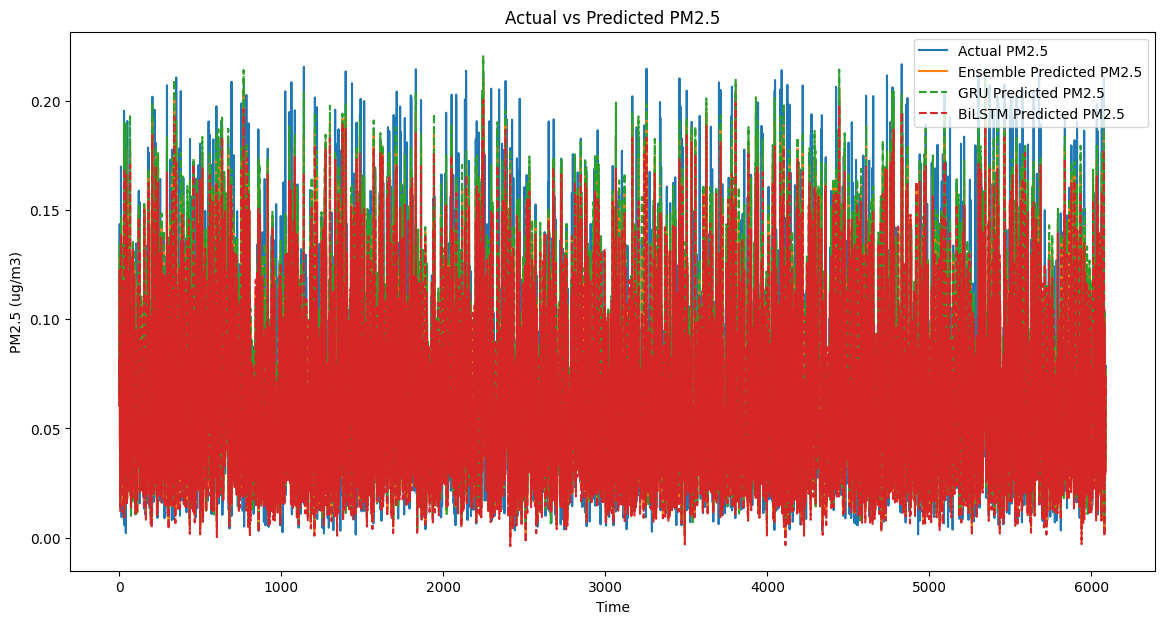

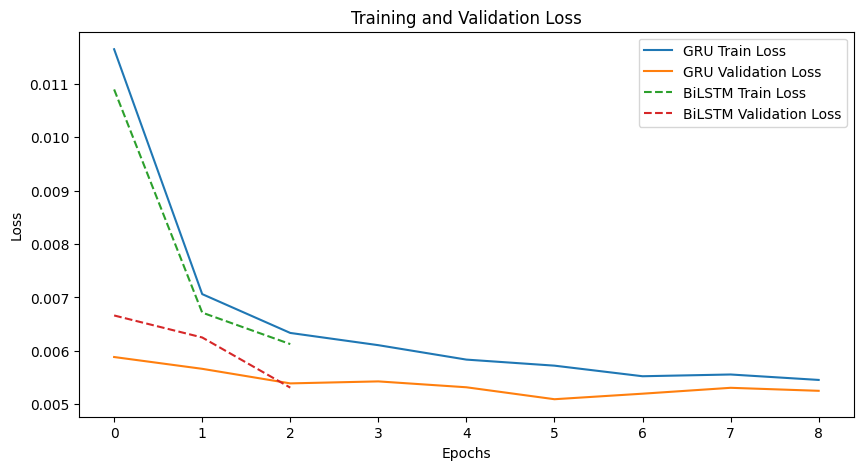

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format and set it as the index
df['From Date'] = pd.to_datetime(df['From Date'])
df.set_index('From Date', inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Apply exponential smoothing to the target variable
def apply_exponential_smoothing(series, trend='add', seasonal=None, seasonal_periods=None):
    model = ExponentialSmoothing(series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fit = model.fit()
    smoothed_series = fit.fittedvalues
    return smoothed_series

# Smooth the target variable
df[target + '_smoothed'] = apply_exponential_smoothing(df[target], trend='add')

# Create lagged features
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Define number of lagged time steps
n_lags = 3

# Create lagged features and prepare dataset
df_lagged = create_lagged_features(df, features, target + '_smoothed', n_lags)
X_data = df_lagged[[f'{feature}_lag_{lag}' for feature in features + [target + "_smoothed"] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target + '_smoothed'].values

# Scale features and target
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create sequences
seq_length = 10
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape for model input
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the GRU model
def build_gru_model(input_shape, gru_units, dropout=0.2):
    inputs = Input(shape=input_shape)
    x = GRU(gru_units, return_sequences=False)(inputs)
    x = Dropout(dropout)(x)
    outputs = Dense(1)(x)
    return Model(inputs, outputs)

# Build the BiLSTM model
def build_bilstm_model(input_shape, lstm_units, dropout=0.2):
    inputs = Input(shape=input_shape)
    x = Bidirectional(LSTM(lstm_units, return_sequences=False))(inputs)
    x = Dropout(dropout)(x)
    outputs = Dense(1)(x)
    return Model(inputs, outputs)

# Define model parameters
input_shape = (seq_length, X.shape[2])
gru_units = 50
lstm_units = 50
dropout = 0.2

# Build and compile the GRU model
gru_model = build_gru_model(input_shape, gru_units, dropout)
gru_model.compile(optimizer='adam', loss='mse')

# Build and compile the BiLSTM model
bilstm_model = build_bilstm_model(input_shape, lstm_units, dropout)
bilstm_model.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the GRU model
history_gru = gru_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Train the BiLSTM model
history_bilstm = bilstm_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions from both models
y_pred_gru = gru_model.predict(X_test)
y_pred_bilstm = bilstm_model.predict(X_test)

# Average the predictions from both models to form the ensemble prediction
y_pred_avg = (y_pred_gru + y_pred_bilstm) / 2

# Inverse transform predictions and true values
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_avg_inv = target_scaler.inverse_transform(y_pred_avg)
y_pred_gru_inv = target_scaler.inverse_transform(y_pred_gru)
y_pred_bilstm_inv = target_scaler.inverse_transform(y_pred_bilstm)

# Calculate evaluation metrics
mse_avg = mean_squared_error(y_test_inv, y_pred_avg_inv)
mape_avg = mean_absolute_percentage_error(y_test_inv, y_pred_avg_inv)
rmse_avg = np.sqrt(mse_avg)
r2_avg = r2_score(y_test_inv, y_pred_avg_inv)
wape_avg = np.sum(np.abs(y_test_inv - y_pred_avg_inv)) / np.sum(y_test_inv)

mse_gru = mean_squared_error(y_test_inv, y_pred_gru_inv)
mape_gru = mean_absolute_percentage_error(y_test_inv, y_pred_gru_inv)
rmse_gru = np.sqrt(mse_gru)
r2_gru = r2_score(y_test_inv, y_pred_gru_inv)
wape_gru = np.sum(np.abs(y_test_inv - y_pred_gru_inv)) / np.sum(y_test_inv)

mse_bilstm = mean_squared_error(y_test_inv, y_pred_bilstm_inv)
mape_bilstm = mean_absolute_percentage_error(y_test_inv, y_pred_bilstm_inv)
rmse_bilstm = np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test_inv, y_pred_bilstm_inv)
wape_bilstm = np.sum(np.abs(y_test_inv - y_pred_bilstm_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'Ensemble Model Metrics:')
print(f'  MSE: {mse_avg}')
print(f'  MAPE: {mape_avg}')
print(f'  RMSE: {rmse_avg}')
print(f'  R2: {r2_avg}')
print(f'  WAPE: {wape_avg}')

print(f'GRU Model Metrics:')
print(f'  MSE: {mse_gru}')
print(f'  MAPE: {mape_gru}')
print(f'  RMSE: {rmse_gru}')
print(f'  R2: {r2_gru}')
print(f'  WAPE: {wape_gru}')

print(f'BiLSTM Model Metrics:')
print(f'  MSE: {mse_bilstm}')
print(f'  MAPE: {mape_bilstm}')
print(f'  RMSE: {rmse_bilstm}')
print(f'  R2: {r2_bilstm}')
print(f'  WAPE: {wape_bilstm}')

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_avg_inv, label='Ensemble Predicted PM2.5')
plt.plot(y_pred_gru_inv, label='GRU Predicted PM2.5', linestyle='--')
plt.plot(y_pred_bilstm_inv, label='BiLSTM Predicted PM2.5', linestyle='--')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history_gru.history['loss'], label='GRU Train Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
plt.plot(history_bilstm.history['loss'], label='BiLSTM Train Loss', linestyle='--')
plt.plot(history_bilstm.history['val_loss'], label='BiLSTM Validation Loss', linestyle='--')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Epoch 1/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.0160 - val_loss: 0.0069 - learning_rate: 0.0010
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0078 - val_loss: 0.0062 - learning_rate: 0.0010
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0069 - val_loss: 0.0055 - learning_rate: 0.0010
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0065 - val_loss: 0.0067 - learning_rate: 0.0010
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0065 - val_loss: 0.0054 - learning_rate: 0.0010
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0063 - val_loss: 0.0051 - learning_rate: 0.0010
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0061 - val_loss: 0.0055 - learning_rate: 0.0010
Epoch 8/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0062 - val_loss: 0.0051 - learning_rate: 0.0010
Epoch 9/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0058 - val_loss: 0.0053 - learn

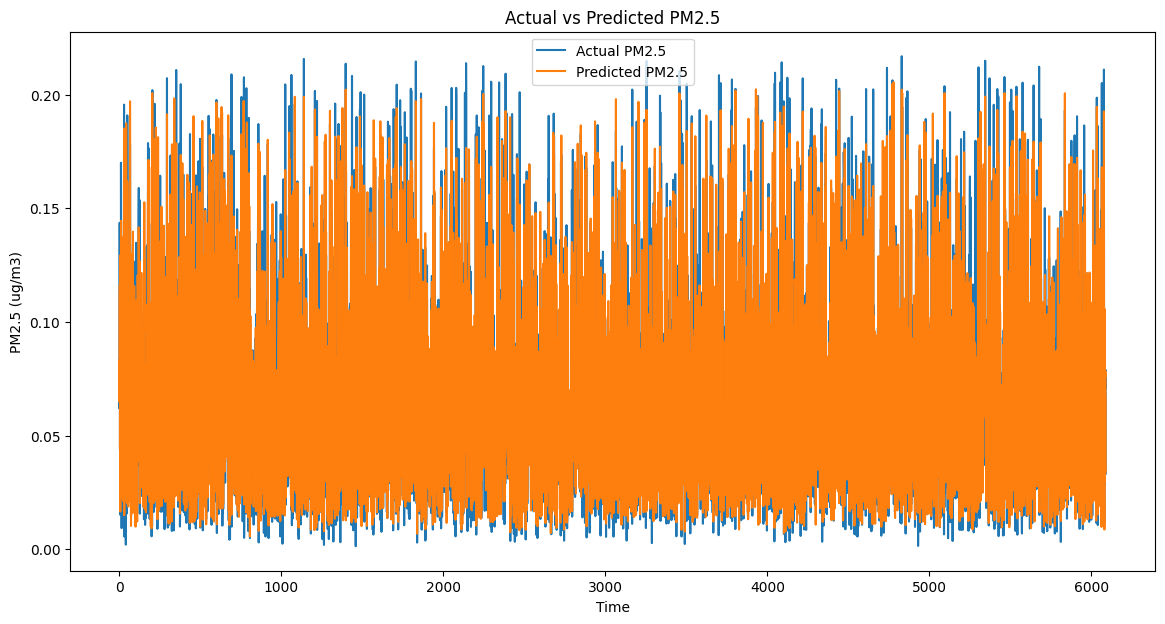

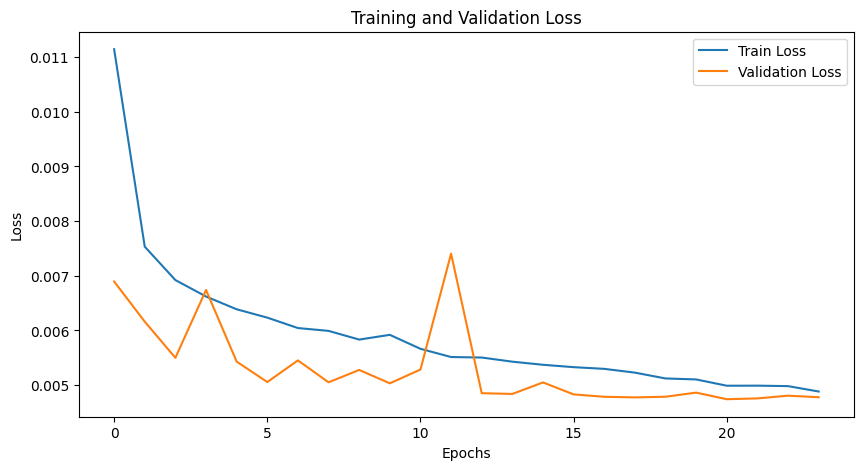

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format and set it as the index
df['From Date'] = pd.to_datetime(df['From Date'])
df.set_index('From Date', inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Apply exponential smoothing to the target variable
def apply_exponential_smoothing(series, trend='add', seasonal=None, seasonal_periods=None):
    model = ExponentialSmoothing(series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fit = model.fit()
    smoothed_series = fit.fittedvalues
    return smoothed_series

# Smooth the target variable
df[target + '_smoothed'] = apply_exponential_smoothing(df[target], trend='add')

# Create lagged features
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Define number of lagged time steps
n_lags = 3

# Create lagged features and prepare dataset
df_lagged = create_lagged_features(df, features, target + '_smoothed', n_lags)
X_data = df_lagged[[f'{feature}_lag_{lag}' for feature in features + [target + "_smoothed"] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target + '_smoothed'].values

# Scale features and target
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create sequences
seq_length = 10
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape for model input
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a model without hyperparameter tuning
def build_model():
    inputs = Input(shape=(seq_length, X.shape[2]))
    x = Bidirectional(LSTM(64, return_sequences=True))(inputs)  # Increased units
    x = Dropout(0.3)(x)  # Increased dropout rate
    x = LSTM(32, return_sequences=True)(x)  # Added an extra LSTM layer
    x = Dropout(0.3)(x)  # Increased dropout rate
    x = GRU(32, return_sequences=False)(x)
    x = Dropout(0.3)(x)  # Increased dropout rate
    outputs = Dense(1)(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')  # Using Adam optimizer
    return model

# Build and train the model
model = build_model()

# Set up early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9

lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])

# Make predictions and inverse transform
y_pred_scaled = model.predict(X_test)
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Epoch 1/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.0153 - val_loss: 0.0091 - learning_rate: 0.0010
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0080 - val_loss: 0.0070 - learning_rate: 0.0010
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0072 - val_loss: 0.0074 - learning_rate: 0.0010
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0070 - val_loss: 0.0053 - learning_rate: 0.0010
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0063 - val_loss: 0.0060 - learning_rate: 0.0010
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0062 - val_loss: 0.0056 - learning_rate: 0.0010
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0061 - val_loss: 0.0058 - learning_rate: 0.0010
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
MSE: 0.00024979020280207814
MAPE: 0.2660935588954215
RMSE: 0.015804752538463807
R2: 0.8772982524608506
WAPE: 0.15685340396608893


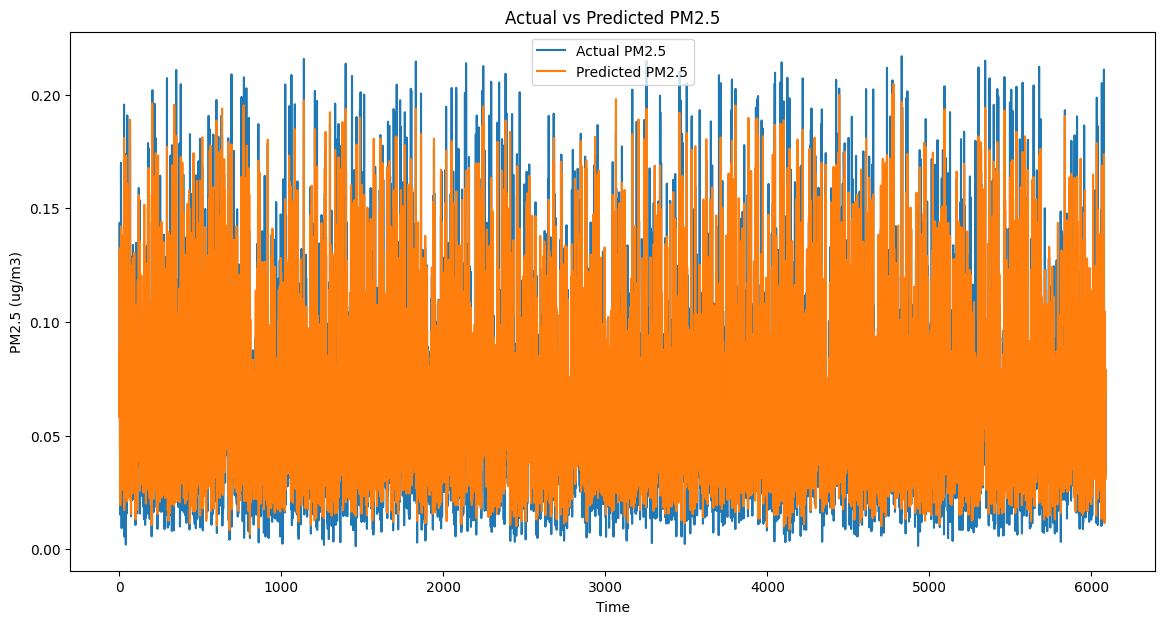

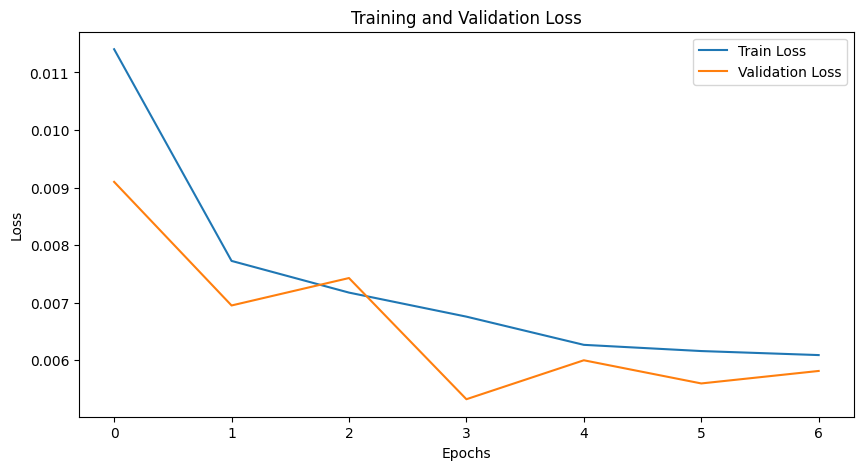

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format and set it as the index
df['From Date'] = pd.to_datetime(df['From Date'])
df.set_index('From Date', inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Apply exponential smoothing to the target variable
def apply_exponential_smoothing(series, trend='add', seasonal=None, seasonal_periods=None):
    model = ExponentialSmoothing(series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fit = model.fit()
    smoothed_series = fit.fittedvalues
    return smoothed_series

# Smooth the target variable
df[target + '_smoothed'] = apply_exponential_smoothing(df[target], trend='add')

# Create lagged features
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Define number of lagged time steps
n_lags = 3

# Create lagged features and prepare dataset
df_lagged = create_lagged_features(df, features, target + '_smoothed', n_lags)
X_data = df_lagged[[f'{feature}_lag_{lag}' for feature in features + [target + "_smoothed"] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target + '_smoothed'].values

# Scale features and target
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create sequences
seq_length = 10
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape for model input
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a model with LSTM and GRU layers
def build_model():
    inputs = Input(shape=(seq_length, X.shape[2]))
    x = Bidirectional(LSTM(64, return_sequences=True))(inputs)  # Bidirectional LSTM layer
    x = Dropout(0.3)(x)  # Dropout layer to prevent overfitting
    x = LSTM(32, return_sequences=True)(x)  # Additional LSTM layer
    x = Dropout(0.3)(x)  # Dropout layer to prevent overfitting
    x = GRU(32, return_sequences=False)(x)  # GRU layer
    x = Dropout(0.3)(x)  # Dropout layer to prevent overfitting
    outputs = Dense(1)(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')  # Using Adam optimizer
    return model

# Build and train the model
model = build_model()

# Set up early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9

lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])

# Make predictions and inverse transform
y_pred_scaled = model.predict(X_test)
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Epoch 1/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.0568 - val_loss: 0.0085 - learning_rate: 0.0010
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0104 - val_loss: 0.0063 - learning_rate: 0.0010
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0080 - val_loss: 0.0065 - learning_rate: 0.0010
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0076 - val_loss: 0.0060 - learning_rate: 0.0010
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0070 - val_loss: 0.0071 - learning_rate: 0.0010
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0065 - val_loss: 0.0061 - learning_rate: 0.0010
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0065 - val_loss: 0.0054 - learning_rate: 0.0010
Epoch 8/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0060 - val_loss: 0.0055 - learning_rate: 0.0010
Epoch 9/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0059 - val_loss: 0.0056 - learn

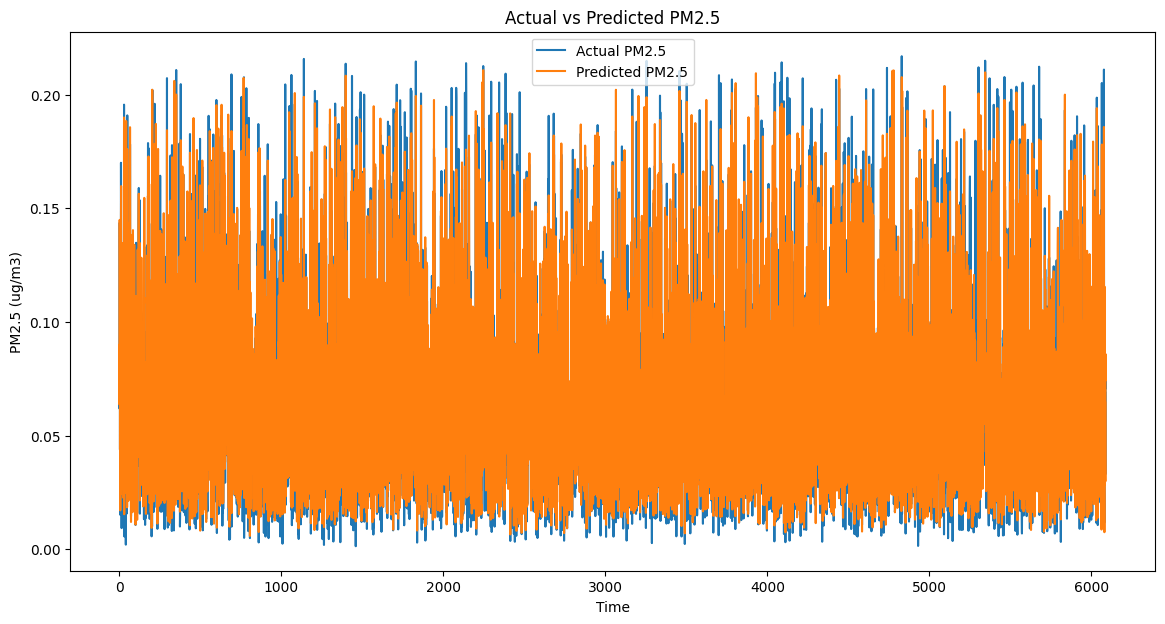

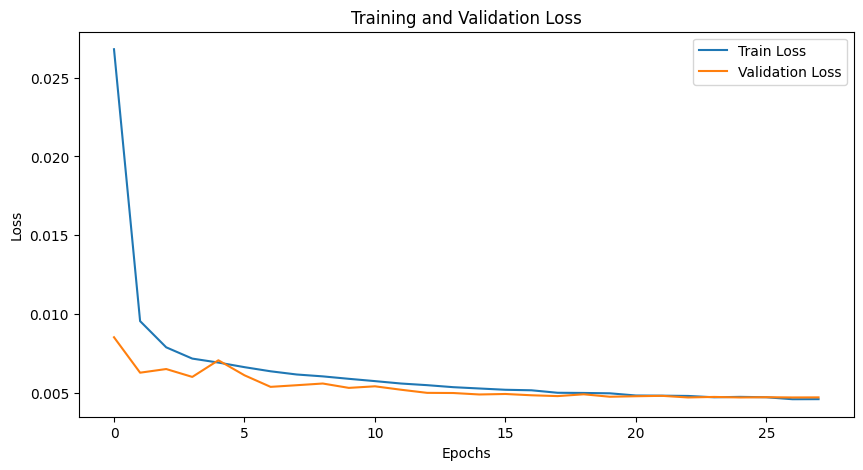

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format and set it as the index
df['From Date'] = pd.to_datetime(df['From Date'])
df.set_index('From Date', inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Apply exponential smoothing to the target variable
def apply_exponential_smoothing(series, trend='add', seasonal=None, seasonal_periods=None):
    model = ExponentialSmoothing(series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fit = model.fit()
    smoothed_series = fit.fittedvalues
    return smoothed_series

# Smooth the target variable
df[target + '_smoothed'] = apply_exponential_smoothing(df[target], trend='add')

# Create lagged features
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Define number of lagged time steps
n_lags = 3

# Create lagged features and prepare dataset
df_lagged = create_lagged_features(df, features, target + '_smoothed', n_lags)
X_data = df_lagged[[f'{feature}_lag_{lag}' for feature in features + [target + "_smoothed"] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target + '_smoothed'].values

# Scale features and target
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create sequences
seq_length = 10
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape for model input
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Transformer block
def transformer_block(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(
        key_dim=head_size, 
        num_heads=num_heads, 
        dropout=dropout
    )(x, x)
    x = Dropout(dropout)(x)
    res = Add()([x, inputs])
    
    # Feed Forward Part
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return Add()([x, res])

# Define a model with Transformer and GRU layers
def build_model():
    inputs = Input(shape=(seq_length, X.shape[2]))
    x = transformer_block(inputs, head_size=64, num_heads=4, ff_dim=32, dropout=0.3)
    x = GRU(32, return_sequences=False)(x)  # GRU layer
    x = Dropout(0.3)(x)  # Dropout layer to prevent overfitting
    outputs = Dense(1)(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')  # Using Adam optimizer
    return model

# Build and train the model
model = build_model()

# Set up early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9

lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])

# Make predictions and inverse transform
y_pred_scaled = model.predict(X_test)
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Epoch 1/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0173 - val_loss: 0.0074 - learning_rate: 0.0010
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0088 - val_loss: 0.0060 - learning_rate: 0.0010
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0074 - val_loss: 0.0057 - learning_rate: 0.0010
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0071 - val_loss: 0.0062 - learning_rate: 0.0010
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0065 - val_loss: 0.0076 - learning_rate: 0.0010
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0064 - val_loss: 0.0054 - learning_rate: 0.0010
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0064 - val_loss: 0.0053 - learning_rate: 0.0010
Epoch 8/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0065 - val_loss: 0.0065 - learning_rate: 0.0010
Epoch 9/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0060 - val_loss: 0.0052 - learning_rate

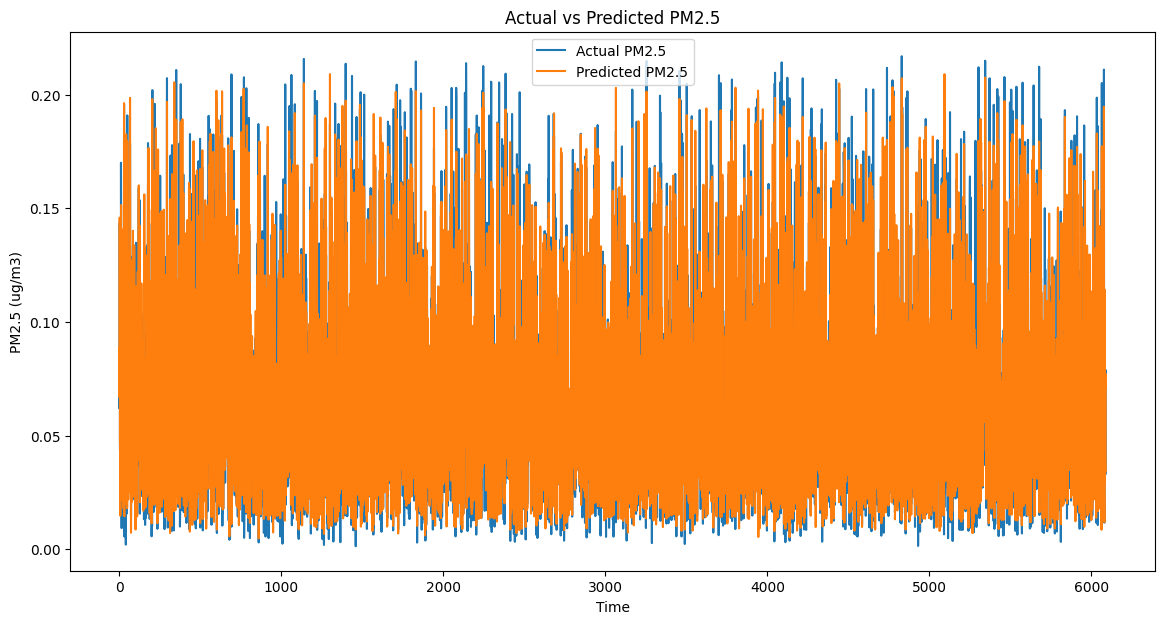

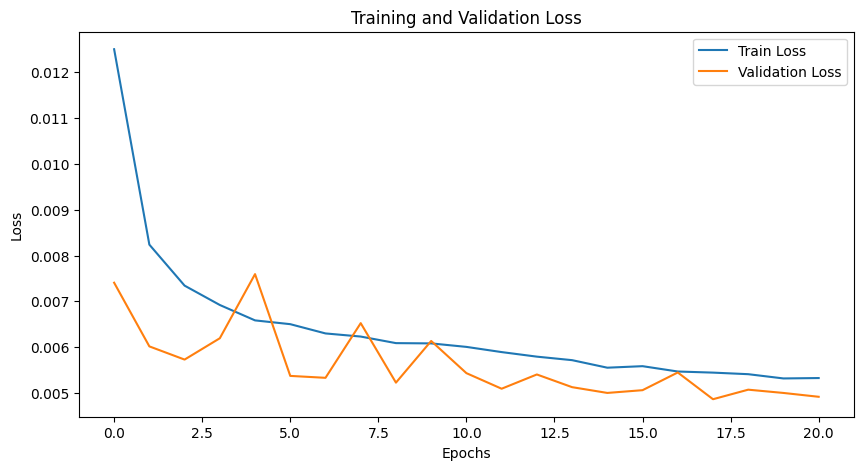

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, GRU, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format and set it as the index
df['From Date'] = pd.to_datetime(df['From Date'])
df.set_index('From Date', inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Apply exponential smoothing to the target variable
def apply_exponential_smoothing(series, trend='add', seasonal=None, seasonal_periods=None):
    model = ExponentialSmoothing(series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fit = model.fit()
    smoothed_series = fit.fittedvalues
    return smoothed_series

# Smooth the target variable
df[target + '_smoothed'] = apply_exponential_smoothing(df[target], trend='add')

# Create lagged features
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Define number of lagged time steps
n_lags = 3

# Create lagged features and prepare dataset
df_lagged = create_lagged_features(df, features, target + '_smoothed', n_lags)
X_data = df_lagged[[f'{feature}_lag_{lag}' for feature in features + [target + "_smoothed"] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target + '_smoothed'].values

# Scale features and target
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create sequences
seq_length = 10
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape for model input
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model with Conv1D and GRU layers
def build_model():
    inputs = Input(shape=(seq_length, X.shape[2]))
    
    # Conv1D layer to extract features
    x = Conv1D(filters=64, kernel_size=3, padding='causal', activation='relu')(inputs)
    x = Conv1D(filters=64, kernel_size=3, padding='causal', activation='relu')(x)
    x = Dropout(0.3)(x)
    
    # GRU layer to capture temporal dependencies
    x = GRU(32, return_sequences=False)(x)
    x = Dropout(0.3)(x)
    
    outputs = Dense(1)(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Build and train the model
model = build_model()

# Set up early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9

lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])

# Make predictions and inverse transform
y_pred_scaled = model.predict(X_test)
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Epoch 1/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0223 - val_loss: 0.0104 - learning_rate: 0.0010
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0112 - val_loss: 0.0085 - learning_rate: 0.0010
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0101 - val_loss: 0.0105 - learning_rate: 0.0010
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0096 - val_loss: 0.0082 - learning_rate: 0.0010
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0095 - val_loss: 0.0080 - learning_rate: 0.0010
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0091 - val_loss: 0.0077 - learning_rate: 0.0010
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0089 - val_loss: 0.0076 - learning_rate: 0.0010
Epoch 8/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0087 - val_loss: 0.0080 - learning_rate: 0.0010
Epoch 9/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0089 - val_loss: 0.0078 - learning_rate

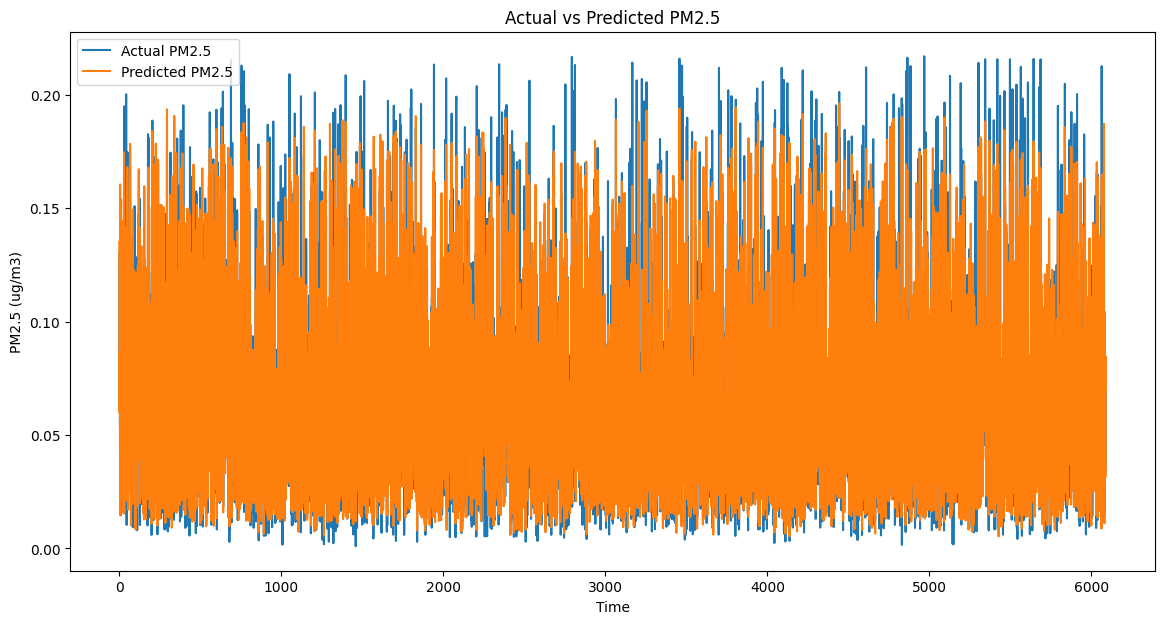

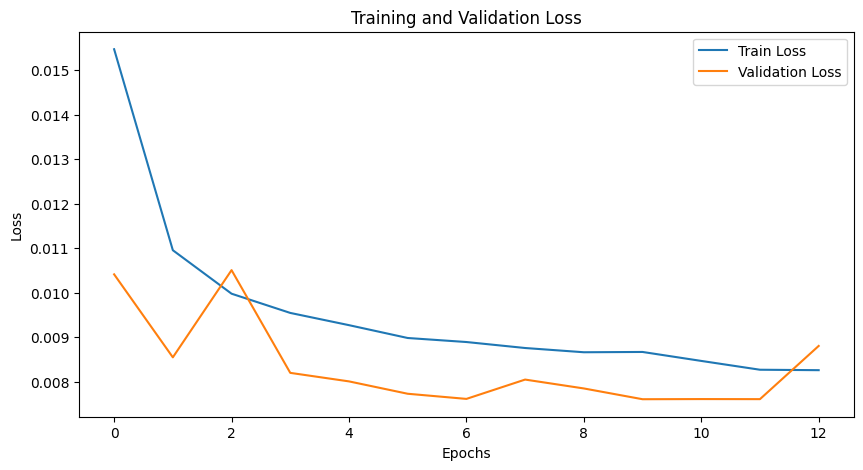

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format and set it as the index
df['From Date'] = pd.to_datetime(df['From Date'])
df.set_index('From Date', inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Apply exponential smoothing to the target variable
def apply_exponential_smoothing(series, trend='add', seasonal=None, seasonal_periods=None):
    model = ExponentialSmoothing(series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fit = model.fit()
    smoothed_series = fit.fittedvalues
    return smoothed_series

# Smooth the target variable
df[target + '_smoothed'] = apply_exponential_smoothing(df[target], trend='add')

# Create lagged features
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Define number of lagged time steps
n_lags = 3

# Create lagged features for the features and PM2.5 target variable
df_lagged = create_lagged_features(df, features, target, n_lags)

# Include lagged PM2.5 as an additional feature
for lag in range(1, n_lags + 1):
    df_lagged[f'{target}_lag_{lag}'] = df_lagged[f'{target}_lag_{lag}']

# Prepare the dataset
X_data = df_lagged[[f'{feature}_lag_{lag}' for feature in features + [target] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target].values

# Scale features and target
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create sequences
seq_length = 10
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape for model input
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model with Conv1D and GRU layers
def build_model():
    inputs = Input(shape=(seq_length, X.shape[2]))
    
    # Conv1D layer to extract features
    x = Conv1D(filters=64, kernel_size=3, padding='causal', activation='relu')(inputs)
    x = Conv1D(filters=64, kernel_size=3, padding='causal', activation='relu')(x)
    x = Dropout(0.3)(x)
    
    # GRU layer to capture temporal dependencies
    x = GRU(32, return_sequences=False)(x)
    x = Dropout(0.3)(x)
    
    outputs = Dense(1)(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Build and train the model
model = build_model()

# Set up early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9

lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])

# Make predictions and inverse transform
y_pred_scaled = model.predict(X_test)
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Epoch 1/50
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0155 - val_loss: 0.0048 - learning_rate: 0.0010
Epoch 2/50
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0064 - val_loss: 0.0060 - learning_rate: 0.0010
Epoch 3/50
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0056 - val_loss: 0.0039 - learning_rate: 0.0010
Epoch 4/50
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0051 - val_loss: 0.0036 - learning_rate: 0.0010
Epoch 5/50
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0049 - val_loss: 0.0049 - learning_rate: 0.0010
Epoch 6/50
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0049 - val_loss: 0.0038 - learning_rate: 0.0010
Epoch 7/50
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0046 - val_loss: 0.0038 - learning_rate: 0.0010
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
MSE: 0.00016671827466254653
MAPE: 0.20810969654850414
RMSE: 0.012911943101739046
R2: 0.9171440142779018
WAPE: 0.11894782971090824


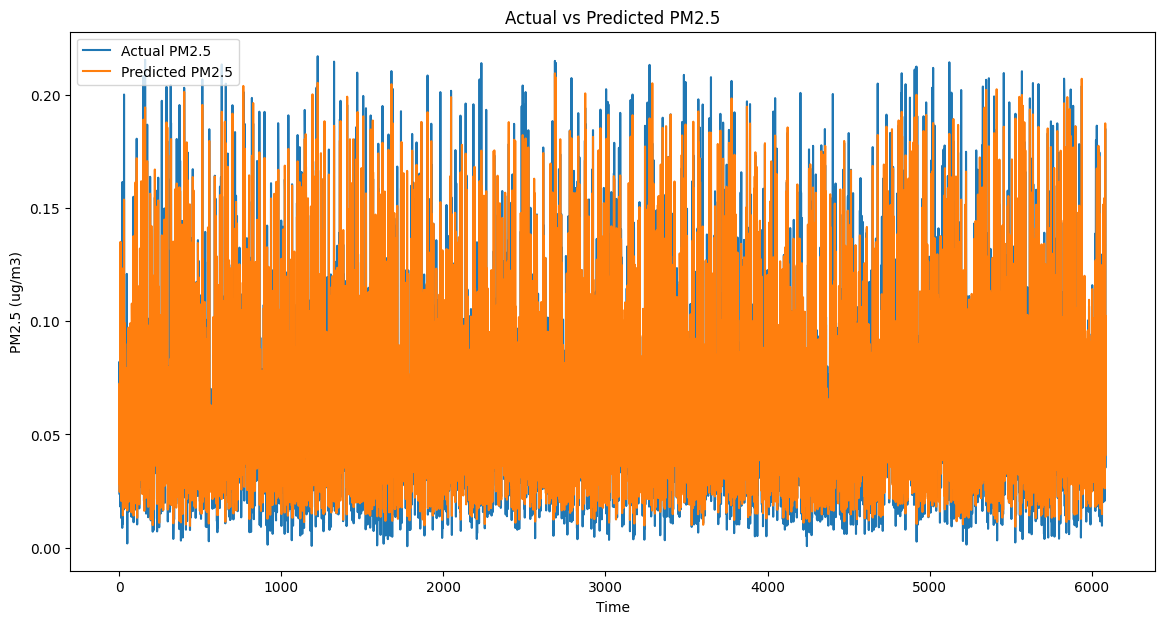

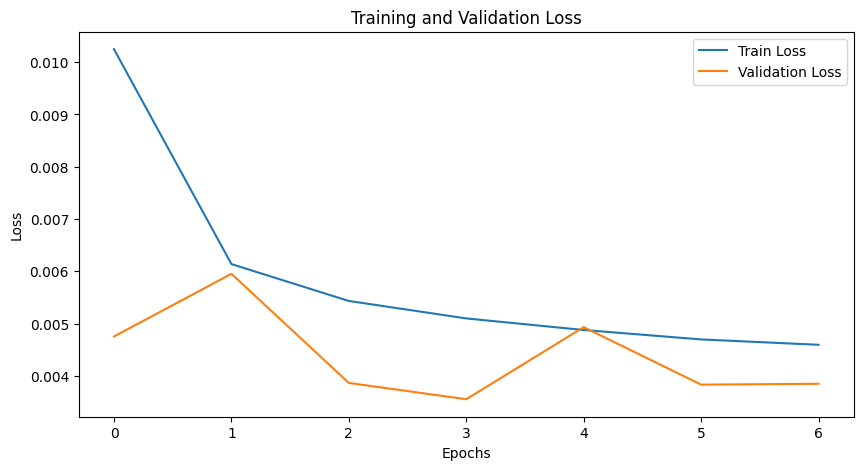

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format and set it as the index
df['From Date'] = pd.to_datetime(df['From Date'])
df.set_index('From Date', inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Apply exponential smoothing to the target variable
def apply_exponential_smoothing(series, trend='add', seasonal=None, seasonal_periods=None):
    model = ExponentialSmoothing(series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fit = model.fit()
    smoothed_series = fit.fittedvalues
    return smoothed_series

# Smooth the target variable
df[target + '_smoothed'] = apply_exponential_smoothing(df[target], trend='add')

# Create lagged features, including lagged PM2.5
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Define number of lagged time steps
n_lags = 3

# Create lagged features and prepare dataset
df_lagged = create_lagged_features(df, features, target + '_smoothed', n_lags)

# Also create lagged features for the original PM2.5 target variable
df_lagged = create_lagged_features(df_lagged, [], target, n_lags)

# Combine lagged PM2.5 and smoothed PM2.5 for input features
X_data = df_lagged[[f'{feature}_lag_{lag}' for feature in features + [target + '_smoothed', target] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target + '_smoothed'].values

# Scale features and target
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create sequences
seq_length = 10
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape for model input
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a model with hyperparameter tuning
def build_model():
    inputs = Input(shape=(seq_length, X.shape[2]))
    x = Bidirectional(LSTM(64, return_sequences=True))(inputs)  # Increased units
    x = Dropout(0.3)(x)  # Increased dropout rate
    x = LSTM(32, return_sequences=True)(x)  # Added an extra LSTM layer
    x = Dropout(0.3)(x)  # Increased dropout rate
    x = GRU(32, return_sequences=False)(x)
    x = Dropout(0.3)(x)  # Increased dropout rate
    outputs = Dense(1)(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')  # Using Adam optimizer
    return model

# Build and train the model
model = build_model()

# Set up early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9

lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])

# Make predictions and inverse transform
y_pred_scaled = model.predict(X_test)
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0252 - val_loss: 0.0091 - learning_rate: 0.0010
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0110 - val_loss: 0.0088 - learning_rate: 0.0010
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0101 - val_loss: 0.0082 - learning_rate: 0.0010
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0096 - val_loss: 0.0082 - learning_rate: 0.0010
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0096 - val_loss: 0.0083 - learning_rate: 0.0010
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0092 - val_loss: 0.0089 - learning_rate: 0.0010
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0094 - val_loss: 0.0088 - learning_rate: 0.0010
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
MSE: 0.00038942115369873737
MAPE: 0.2751869692547277
RMSE: 0.01973375670516735
R2: 0.805304096556877
WAPE: 0.19071702382003974


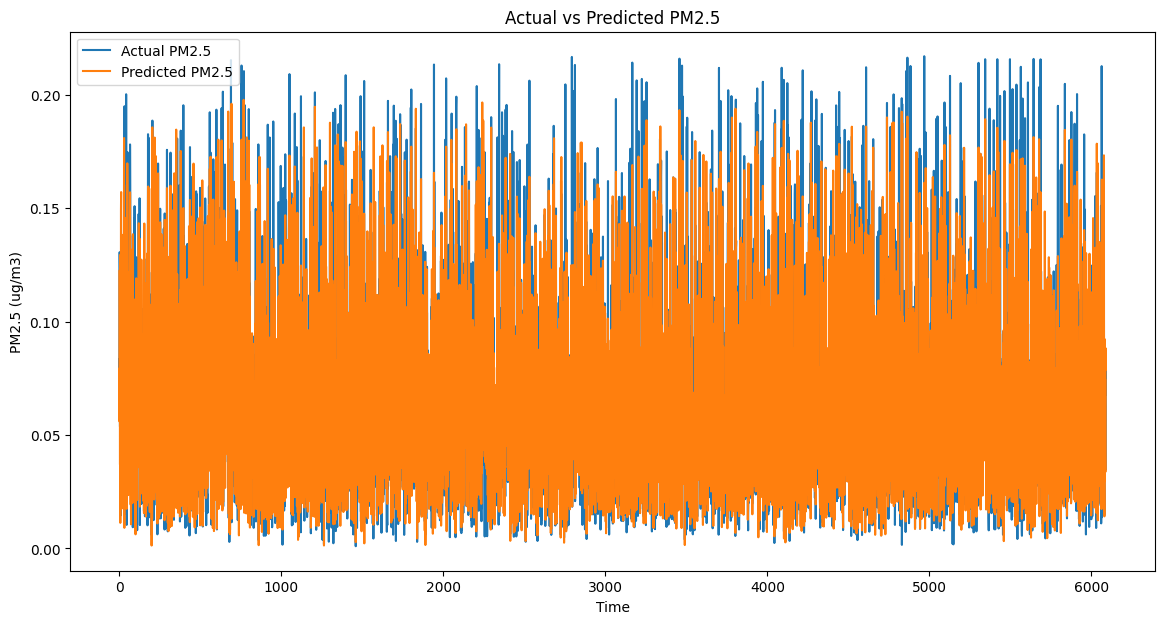

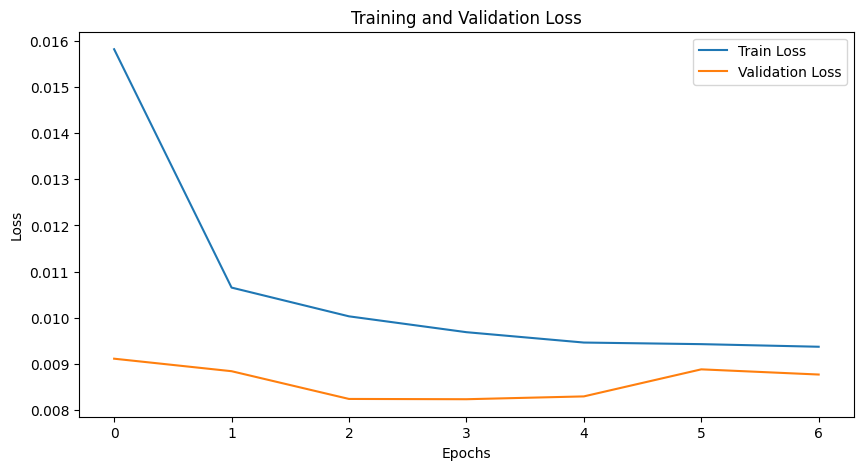

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format and set it as the index
df['From Date'] = pd.to_datetime(df['From Date'])
df.set_index('From Date', inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Create lagged features for PM2.5 and other features
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for lag in range(1, lags + 1):
        lagged_df[f'{target}_lag_{lag}'] = lagged_df[target].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Define number of lagged time steps
n_lags = 3

# Create lagged features for the target and prepare the dataset
df_lagged = create_lagged_features(df, features, target, n_lags)
X_data = df_lagged[[f'{target}_lag_{lag}' for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target].values

# Scale features and target
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create sequences
seq_length = 10
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape for model input
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Transformer block
def transformer_block(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(
        key_dim=head_size, 
        num_heads=num_heads, 
        dropout=dropout
    )(x, x)
    x = Dropout(dropout)(x)
    res = Add()([x, inputs])
    
    # Feed Forward Part
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return Add()([x, res])

# Define a model with Transformer and GRU layers
def build_model():
    inputs = Input(shape=(seq_length, X.shape[2]))
    x = transformer_block(inputs, head_size=64, num_heads=4, ff_dim=32, dropout=0.3)
    x = GRU(32, return_sequences=False)(x)  # GRU layer
    x = Dropout(0.3)(x)  # Dropout layer to prevent overfitting
    outputs = Dense(1)(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')  # Using Adam optimizer
    return model

# Build and train the model
model = build_model()

# Set up early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9

lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])

# Make predictions and inverse transform
y_pred_scaled = model.predict(X_test)
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1523/1523 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0175 - val_loss: 0.0082
Epoch 2/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0091 - val_loss: 0.0070
Epoch 3/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0080 - val_loss: 0.0063
Epoch 4/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0075 - val_loss: 0.0061
Epoch 5/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0071 - val_loss: 0.0063
Epoch 6/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0072 - val_loss: 0.0059
Epoch 7/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0070 - val_loss: 0.0060
Epoch 8/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0067 - val_loss: 0.0063
Epoch 9/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0068 - val_loss: 0.0059
Epoch 10/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0069 - val_loss: 0.0060
Epoch 11/50
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 12/50
1523/1523 ━━━━━━━━

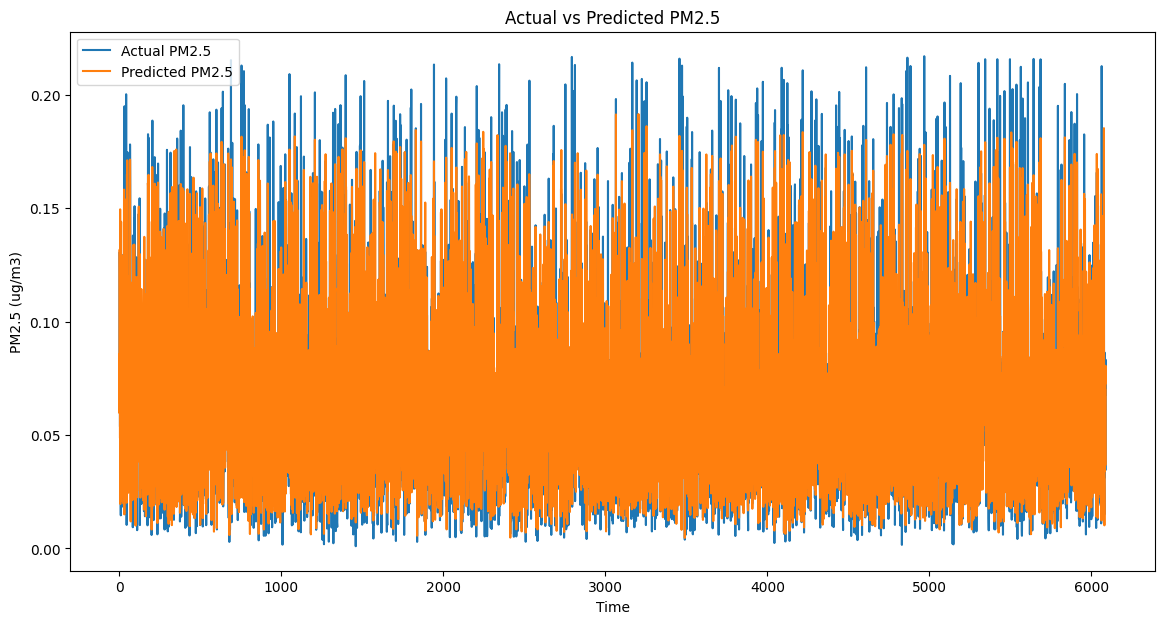

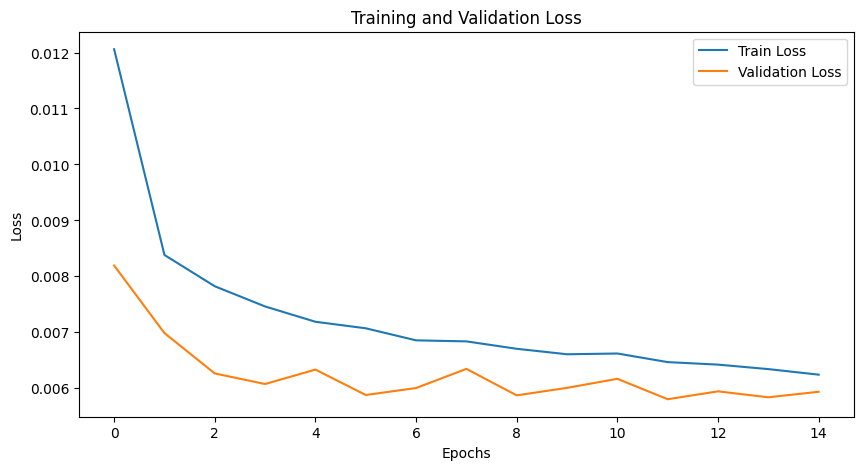

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format
df['From Date'] = pd.to_datetime(df['From Date'])

# Set 'From Date' as the index
df.set_index('From Date', inplace=True)

# Drop any rows with missing values
df.dropna(inplace=True)

# Features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Create lagged features for the target variable only
def create_lagged_features(df, target, lags):
    lagged_df = df.copy()
    for lag in range(1, lags + 1):
        lagged_df[f'{target}_lag_{lag}'] = lagged_df[target].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Number of lagged time steps
n_lags = 3

# Create lagged features for PM2.5
df_lagged = create_lagged_features(df, target, n_lags)

# Extract features and target
X_data = df_lagged[features + [f'{target}_lag_{lag}' for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target].values

# Scale features and target separately
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Prepare data for GRU
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

# Sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape X for GRU (batch_size, timesteps, features)
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the GRU model
model = Sequential([
    GRU(100, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    Dropout(0.2),  # Dropout layer to prevent overfitting
    GRU(50, return_sequences=True),
    Dropout(0.2),
    GRU(25),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform to get actual values
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.


Epoch 1/20
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0142 - val_loss: 0.0060 - learning_rate: 0.0010
Epoch 2/20
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0065 - val_loss: 0.0045 - learning_rate: 0.0010
Epoch 3/20
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0058 - val_loss: 0.0039 - learning_rate: 0.0010
Epoch 4/20
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0050 - val_loss: 0.0039 - learning_rate: 0.0010
Epoch 5/20
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0047 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 6/20
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0047 - val_loss: 0.0040 - learning_rate: 0.0010
Epoch 7/20
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0046 - val_loss: 0.0036 - learning_rate: 0.0010
Epoch 8/20
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0046 - val_loss: 0.0039 - learning_rate: 0.0010
Epoch 9/20
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0045 - val_loss: 0.0037 - learn

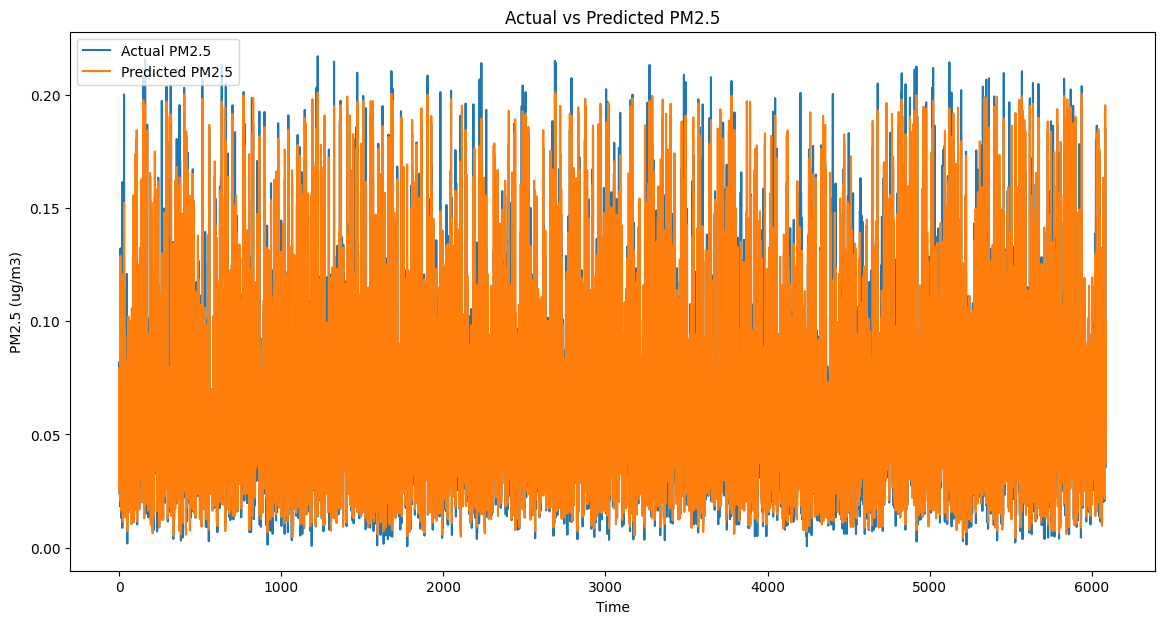

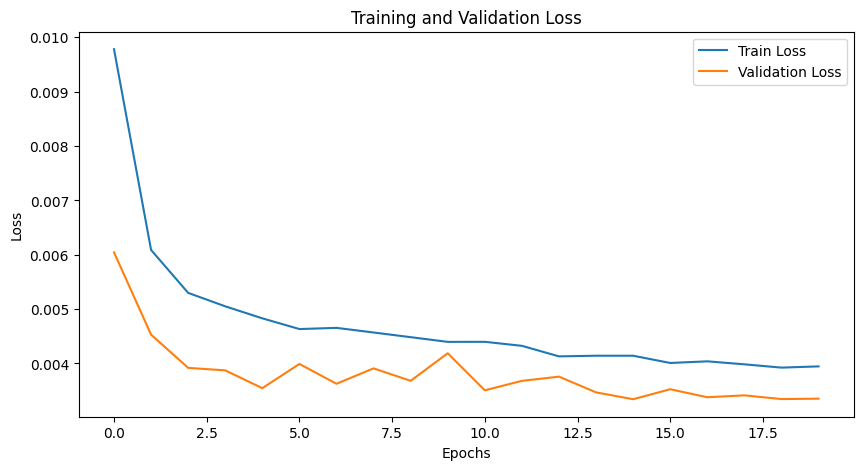

Provided model function fails when applied to the provided data set.


ValueError: as_list() is not defined on an unknown TensorShape.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model, save_model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import shap

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format and set it as the index
df['From Date'] = pd.to_datetime(df['From Date'])
df.set_index('From Date', inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Apply exponential smoothing to the target variable
def apply_exponential_smoothing(series, trend='add', seasonal=None, seasonal_periods=None):
    model = ExponentialSmoothing(series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fit = model.fit()
    smoothed_series = fit.fittedvalues
    return smoothed_series

# Smooth the target variable
df[target + '_smoothed'] = apply_exponential_smoothing(df[target], trend='add')

# Create lagged features, including lagged PM2.5
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Define number of lagged time steps
n_lags = 3

# Create lagged features and prepare dataset
df_lagged = create_lagged_features(df, features, target + '_smoothed', n_lags)

# Also create lagged features for the original PM2.5 target variable
df_lagged = create_lagged_features(df_lagged, [], target, n_lags)

# Combine lagged PM2.5 and smoothed PM2.5 for input features
X_data = df_lagged[[f'{feature}_lag_{lag}' for feature in features + [target + '_smoothed', target] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target + '_smoothed'].values

# Scale features and target
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create sequences
seq_length = 10
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape for model input
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a model with hyperparameter tuning
def build_model():
    inputs = Input(shape=(seq_length, X.shape[2]))
    x = Bidirectional(LSTM(64, return_sequences=True))(inputs)
    x = Dropout(0.3)(x)
    x = LSTM(32, return_sequences=True)(x)
    x = Dropout(0.3)(x)
    x = GRU(32, return_sequences=False)(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1)(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Build and train the model
model = build_model()

# Set up learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9

lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

# Save the model
model.save('pm25_forecasting_model.h5')

# Make predictions and inverse transform
y_pred_scaled = model.predict(X_test)
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# SHAP Explanation
# Convert the data into the right format for SHAP
X_train_shap = X_train.reshape(X_train.shape[0], -1)  # Flatten the sequences
X_test_shap = X_test.reshape(X_test.shape[0], -1)

# Initialize SHAP explainer
explainer = shap.KernelExplainer(model.predict, X_train_shap)

# Choose an instance to explain
instance_idx = np.random.randint(0, X_test_shap.shape[0])
instance = X_test_shap[instance_idx]

# Explain the chosen instance
shap_values = explainer.shap_values(instance)

# Plot SHAP values
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, instance, feature_names=[f'{feature}_lag_{lag}' for feature in features + [target + '_smoothed', target] for lag in range(1, n_lags + 1)])


2024-08-16 06:32:21.861448: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 06:32:21.885225: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 06:32:21.892316: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been 

Epoch 1/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 0.0153 - val_loss: 0.0053 - learning_rate: 0.0010
Epoch 2/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0063 - val_loss: 0.0038 - learning_rate: 0.0010
Epoch 3/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0055 - val_loss: 0.0044 - learning_rate: 0.0010
Epoch 4/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0052 - val_loss: 0.0037 - learning_rate: 0.0010
Epoch 5/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0047 - val_loss: 0.0040 - learning_rate: 0.0010
Epoch 6/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0049 - val_loss: 0.0036 - learning_rate: 0.0010
Epoch 7/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0047 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 8/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0045 - val_loss: 0.0042 - learning_rate: 0.0010
Epoch 9/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0044 - val_loss: 0.003

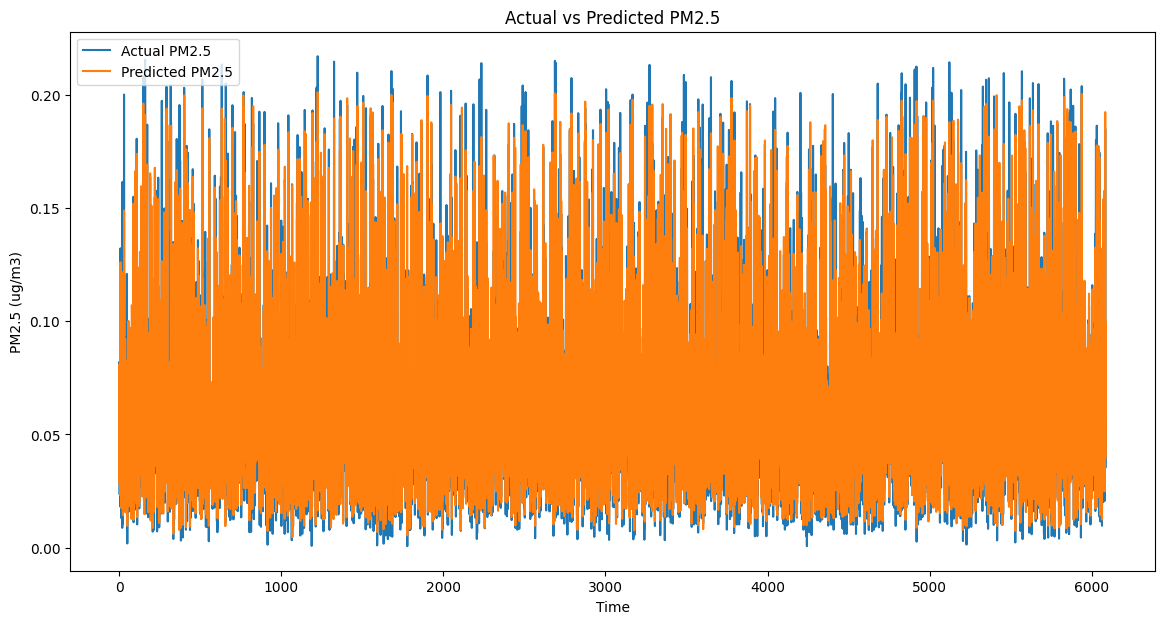

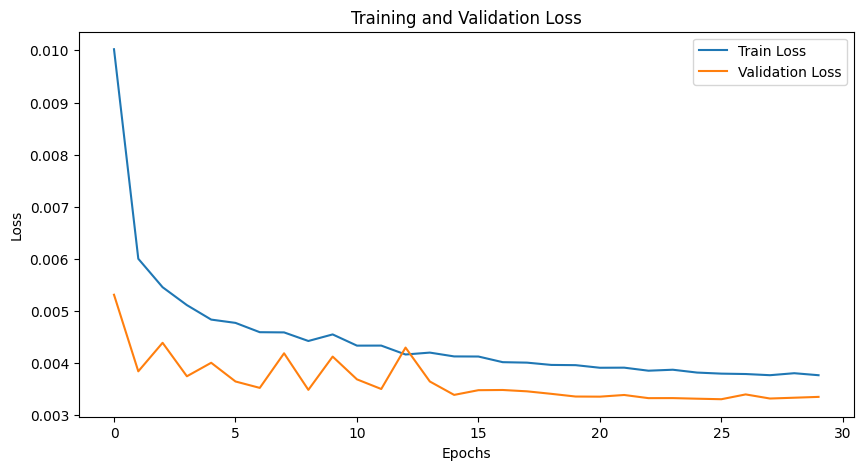

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format and set it as the index
df['From Date'] = pd.to_datetime(df['From Date'])
df.set_index('From Date', inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Apply exponential smoothing to the target variable
def apply_exponential_smoothing(series, trend='add', seasonal=None, seasonal_periods=None):
    model = ExponentialSmoothing(series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fit = model.fit()
    smoothed_series = fit.fittedvalues
    return smoothed_series

# Smooth the target variable
df[target + '_smoothed'] = apply_exponential_smoothing(df[target], trend='add')

# Create lagged features, including lagged PM2.5
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Define number of lagged time steps
n_lags = 3

# Create lagged features and prepare dataset
df_lagged = create_lagged_features(df, features, target + '_smoothed', n_lags)

# Also create lagged features for the original PM2.5 target variable
df_lagged = create_lagged_features(df_lagged, [], target, n_lags)

# Combine lagged PM2.5 and smoothed PM2.5 for input features
X_data = df_lagged[[f'{feature}_lag_{lag}' for feature in features + [target + '_smoothed', target] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target + '_smoothed'].values

# Scale features and target
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create sequences
seq_length = 10
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape for model input
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a model with hyperparameter tuning
def build_model():
    inputs = Input(shape=(seq_length, X.shape[2]))
    x = Bidirectional(LSTM(64, return_sequences=True))(inputs)
    x = Dropout(0.3)(x)
    x = LSTM(32, return_sequences=True)(x)
    x = Dropout(0.3)(x)
    x = GRU(32, return_sequences=False)(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1)(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Build and train the model
model = build_model()

# Set up learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9

lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

# Save the model
model.save('pm25_forecasting_model.h5')

# Make predictions and inverse transform
y_pred_scaled = model.predict(X_test)
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


2024-08-16 15:26:57.845058: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 15:26:57.869610: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 15:26:57.876585: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been 

Epoch 1/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0141 - val_loss: 0.0047 - learning_rate: 0.0010
Epoch 2/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0063 - val_loss: 0.0050 - learning_rate: 0.0010
Epoch 3/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0053 - val_loss: 0.0040 - learning_rate: 0.0010
Epoch 4/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0050 - val_loss: 0.0040 - learning_rate: 0.0010
Epoch 5/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0049 - val_loss: 0.0036 - learning_rate: 0.0010
Epoch 6/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0047 - val_loss: 0.0053 - learning_rate: 0.0010
Epoch 7/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0047 - val_loss: 0.0036 - learning_rate: 0.0010
Epoch 8/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0047 - val_loss: 0.0038 - learning_rate: 0.0010
Epoch 9/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0047 - val_loss: 0.0039 - l

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10, 42)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 10, 128)        │        54,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 32)         │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245,285 (958.15 KB)

 Trainable params: 81,761 (319.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 163,524 (638.77 KB)

191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Evaluation Metrics:
MSE: 0.0001591578607769058
MAPE: 0.1688509650256577
RMSE: 0.012615778246977306
R2: 0.9209014040795283
WAPE: 0.11258007149133352


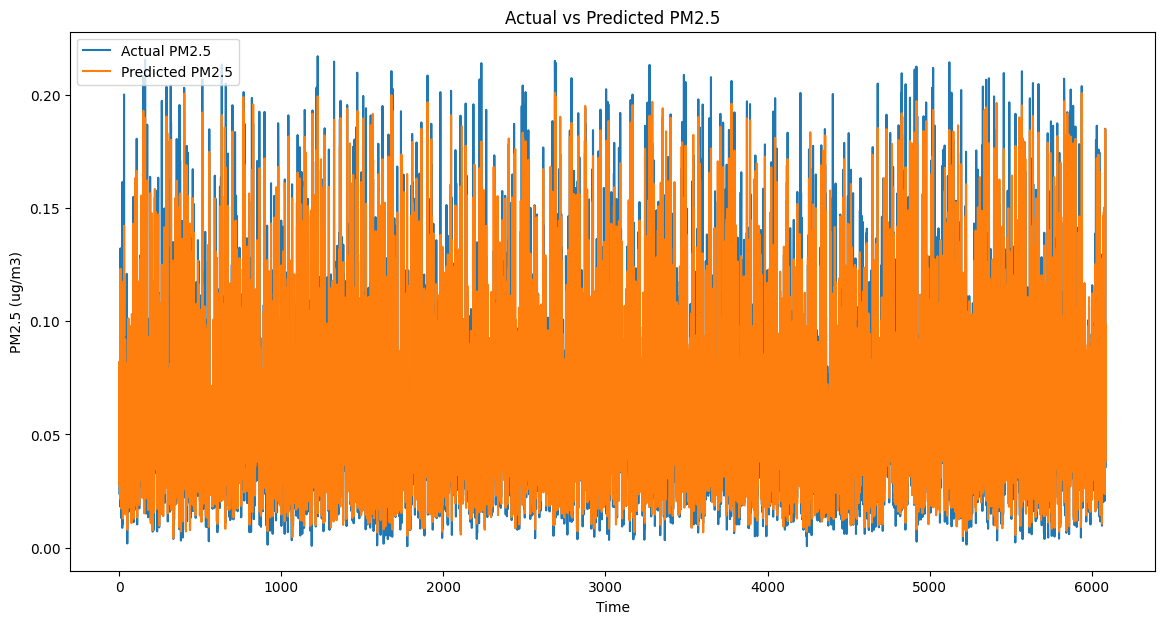

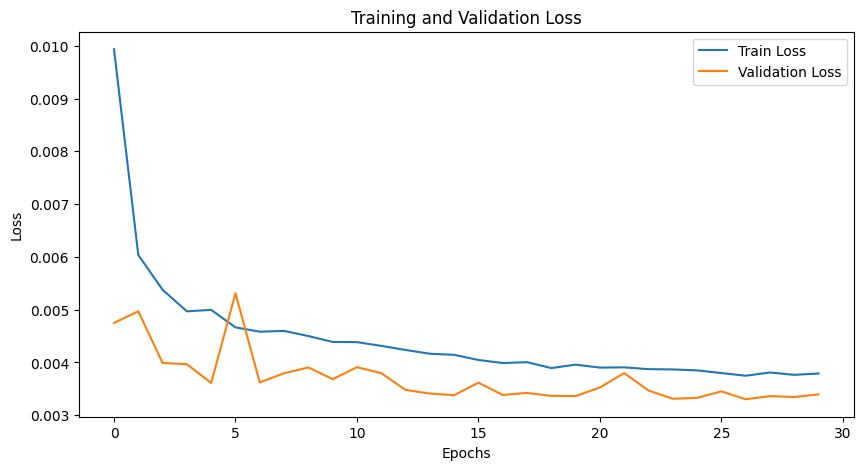

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
df = pd.read_csv('/kaggle/input/bihar-aqi-pure/cleaned_dataset2.csv')

# Convert 'From Date' to datetime format and set it as the index
df['From Date'] = pd.to_datetime(df['From Date'])
df.set_index('From Date', inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target variable
features = [
    'PM10 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 
    'MP-Xylene (ug/m3)', 'WD (degree)', 'BP (mmHg)', 'Xylene (ug/m3)'
]
target = 'PM2.5 (ug/m3)'

# Apply exponential smoothing to the target variable
def apply_exponential_smoothing(series, trend='add', seasonal=None, seasonal_periods=None):
    model = ExponentialSmoothing(series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fit = model.fit()
    smoothed_series = fit.fittedvalues
    return smoothed_series

# Smooth the target variable
df[target + '_smoothed'] = apply_exponential_smoothing(df[target], trend='add')

# Create lagged features, including lagged PM2.5
def create_lagged_features(df, features, target, lags):
    lagged_df = df.copy()
    for feature in features + [target]:
        for lag in range(1, lags + 1):
            lagged_df[f'{feature}_lag_{lag}'] = lagged_df[feature].shift(lag)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Define number of lagged time steps
n_lags = 3

# Create lagged features and prepare dataset
df_lagged = create_lagged_features(df, features, target + '_smoothed', n_lags)

# Also create lagged features for the original PM2.5 target variable
df_lagged = create_lagged_features(df_lagged, [], target, n_lags)

# Combine lagged PM2.5 and smoothed PM2.5 for input features
X_data = df_lagged[[f'{feature}_lag_{lag}' for feature in features + [target + '_smoothed', target] for lag in range(1, n_lags + 1)]]
y_data = df_lagged[target + '_smoothed'].values

# Scale features and target
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_data)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_data.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create sequences
seq_length = 10
X, y = create_sequences(X_scaled, y_scaled, seq_length)

# Reshape for model input
X = X.reshape((X.shape[0], seq_length, X.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a model with hyperparameter tuning
def build_model():
    inputs = Input(shape=(seq_length, X.shape[2]))
    x = Bidirectional(LSTM(64, return_sequences=True))(inputs)
    x = Dropout(0.3)(x)
    x = LSTM(32, return_sequences=True)(x)
    x = Dropout(0.3)(x)
    x = GRU(32, return_sequences=False)(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1)(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Build and train the model
model = build_model()

# Set up learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9

lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

# Save the model
model.save('pm25_forecasting_model.h5')

# Display model summary
print("Model Summary:")
model.summary()

# Make predictions and inverse transform
y_pred_scaled = model.predict(X_test)
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
wape = np.sum(np.abs(y_test_inv - y_pred_inv)) / np.sum(y_test_inv)

# Print evaluation metrics
print(f'\nEvaluation Metrics:')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'WAPE: {wape}')

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual PM2.5')
plt.plot(y_pred_inv, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [2]:
!pip install tensorflow==2.17.0
